# Module 7 -- Unsupervised Machine Learning Techniques Assignment II

## Objectives
It is important in any data science project to define the objective as specific as possible. Below let's write it from general to specific. This will direct your analysis.
* Detect any hospital that may abuse the resources.
* Detect any hospital that may abuse the resources compared to its peers.
* Detect any hospital that may abuse the resources compared to the average (median etc) of its peers.
* Detect any hospital that may abuse the resources compared to the average (median etc) of its peers of the same DRG and State.

## FE:
* We will focus on the "Average Medicare Payments", which is the "Medicare Payment Amount / Total Discharges" to create features.


## Table of Contents <span id="toc" class="anchor">
* [Section 1: data preparation](#Section_1)
    * [Section 1.1: Load data](#Section_11)
    * [Section 1.2: data preparation](#Section_12)
* [Section 2: EDA](#Section_2)
    * [Section 2.1: Distribution plots](#Section_21)
    * [Section 2.2: Count by state(#Sect](#Section_22)    
    * [Section 2.3: Count of top cities](#Section_23)
* [Section 3: Feature engineering](#Section_3)
    * [Section 3.1: Create the benchmark table](#Section_31)
        * [3.2.1 Feature 1: Average Total Payment by State & DRG](#Section_311)
        * [3.2.2 Feature 2: Average Total Discharge by City](#Section_312)
        * [3.2.3 Feature 3: Average Total Discharges by State & DRG](#Section_313)
        * [3.2.4 Feature 4: Average Medicare by City & DRG](#Section_314)
        * [3.2.5 Feature 5: Average Medicare Payments by State & DRG](#Section_315)
        * [3.2.6 Feature 6: Average Total Payments by City](#Section_316)
        * [3.2.7 Feature 7: Average Total Payments by Region & DRG](#Section_317)
        * [3.2.8 Feature 8: Average Total Discharges by Region & DRG](#Section_318)
        * [3.2.9 Feature 9: Average Medicare Payments by Region & DRG](#Section_319)
        * [3.2.10 Feature 10: Average Total Payments by Region & DRG](#Section_3110)
    * [Section 3.2: Create features](#Section_32)    
        * [3.2.1 Feature 1: The ratio to average payment by state and DRG](#Section_321)
        * [3.2.2 Feature 2: The ratio to average total discharges by city](#Section_322)
        * [3.2.3 Feature 3: The ratio to total discharges by state and DRG](#Section_323)
        * [3.2.4 Feature 4: The ratio to average medicare by city and DRG](#Section_324)
        * [3.2.5 Feature 5: The ratio to average medicare payment by state and DRG](#Section_325)
        * [3.2.6 Feature 6: The ratio to average total payment by city](#Section_326)
        * [3.2.7 Feature 7: The ratio to average payment by region and DRG](#Section_327)
        * [3.2.8 Feature 8: The ratio to total discharges by state and DRG](#Section_328)
        * [3.2.9 Feature 9: The ratio to average medicare payment by region and DRG](#Section_329)
        * [3.2.10 Feature 10: The ratio to total payment by region and DRG](#Section_3210)
* [Section 4: Unsupervised Machine Learning Techniques II](#Section_4)
    * [4.1 Autoencoders](#Section_41)
        * [4.1.1 Model 1: [10, 2, 2, 10]](#Section_411)
            * [4.1.1.1 Build your model](#Section_4111)
            * [4.1.1.2 Determine a reasonable boundary](#Section_4112)
            * [4.1.1.3 Present the summary statistics of the normal and abnormal clusters](#Section_4113)
        * [4.1.2 Model 2: [10, 5, 2, 2, 5, 10]](#Section_412)
            * [4.1.1.1 Build your model](#Section_4121)
            * [4.1.1.2 Determine a reasonable boundary](#Section_4122)
            * [4.1.1.3 Present the summary statistics of the normal and abnormal clusters](#Section_4123)
        * [4.1.3 Model 3: [10, 8, 5, 2, 2, 5, 8, 10]](#Section_413)
            * [4.1.3.1 Build your model](#Section_4131)
            * [4.1.3.2 Determine a reasonable boundary](#Section_4132)
            * [4.1.3.3 Present the summary statistics of the normal and abnormal clusters](#Section_4133)
    * [4.2 Isolation Forest (iForest)](#Section_42)
        * [4.2.1 Model 1: max_samples = 100](#Section_421)
            * [4.2.1 Build your model](#Section_4211)
            * [4.2.2 Determine a reasonable boundary](#Section_4212)
            * [4.2.3 Present the summary statistics of the normal and abnormal clusters](#Section_4213)
        * [4.2.2 Model 2: max_samples = 80](#Section_421)
            * [4.2.2.1 Build your model](#Section_4221)
            * [4.2.2.2 Determine a reasonable boundary](#Section_4222)
            * [4.2.2.3 Present the summary statistics of the normal and abnormal clusters](#Section_4223)
        * [4.2.3 Model 3: max_samples = 60](#Section_423)
            * [4.2.3.1 Build your model](#Section_4231)
            * [4.2.3.2 Determine a reasonable boundary](#Section_4232)
            * [4.2.3.3 Present the summary statistics of the normal and abnormal clusters](#Section_4233)

In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

#pd.options.display.float_format = '{:.2f}'.format

## Section 1: Data preparation <a class="anchor" id="Section_1"></a>
[Back to Table of Content](#toc)
### Section 1.1: Load Data <a class="anchor" id="Section_11"></a>
* Import packages and data 
* Rename column
* Change data type and transfer spending amount with dollar sign into numeric
* Understand the data strcuture. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
# C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
# C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
# C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
#   warnings.warn("loaded more than 1 DLL from .libs:"

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
# path = 'C:/Users/Administrator/Desktop/CU/CU_SM2022/APANPS5420_001_2022_2-ANOMALYDETECTION/4'
data = pd.read_csv('.\inpatientCharges.csv')

In [4]:
#data.describe()
#data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [5]:
data.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [6]:
data.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payment']
data = data.drop('Average_Covered_Charges',axis=1)

In [7]:
data.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$5658.33,$4851.44


In [8]:
# Distribution plots of average total payments 
data['Average_Total_Payments'].describe()

count       163065
unique      147842
top       $4370.00
freq             9
Name: Average_Total_Payments, dtype: object

In [9]:
# Change data type and transfer spending amount with dollar sign into numeric
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
data['DRG'] = data['DRG'].astype('category')
data['Provider_State'] = data['Provider_State'].astype('category')
data['Provider_City'] = data['Provider_City'].astype('category')
data['Provider_Id'] = data['Provider_Id'].astype('category')
data['Average_Total_Payments'] = (data['Average_Total_Payments']
                              .str.replace(r'[^-+\d.]', '').astype(float))
data['Average_Medicare_Payment'] = (data['Average_Medicare_Payment']
                              .str.replace(r'[^-+\d.]', '').astype(float))

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DRG                            163065 non-null  category
 1   Provider_Id                    163065 non-null  category
 2   Provider_Name                  163065 non-null  object  
 3   Provider_StreetAddress         163065 non-null  object  
 4   Provider_City                  163065 non-null  category
 5   Provider_State                 163065 non-null  category
 6   Provider_Zipcode               163065 non-null  int64   
 7   Hospital_referral_region_desp  163065 non-null  object  
 8   Total_Discharges               163065 non-null  int64   
 9   Average_Total_Payments         163065 non-null  float64 
 10  Average_Medicare_Payment       163065 non-null  float64 
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 9.9+ MB


## Section 2: EDA <a class="anchor" id="Section_2"></a>
[Back to Table of Content](#toc)
### Section 2.1: Distribution plots <a class="anchor" id="Section_21"></a>

In [11]:
# Distribution plots of average total payments 
data['Average_Total_Payments'].describe()

count    163065.000000
mean       9707.473804
std        7664.642598
min        2673.000000
25%        5234.500000
50%        7214.100000
75%       11286.400000
max      156158.180000
Name: Average_Total_Payments, dtype: float64

<AxesSubplot:xlabel='Average_Total_Payments', ylabel='Count'>

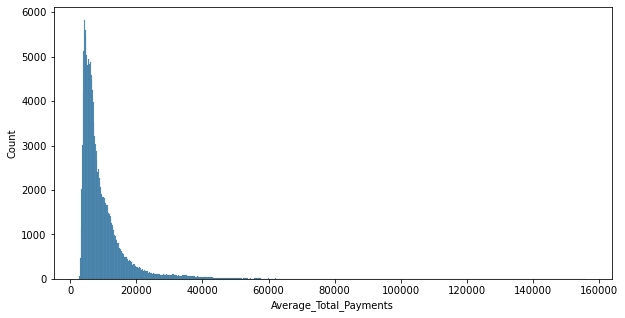

In [12]:
plt.figure(figsize=(10,5)) # Plot a graph with reasonable size.
sns.histplot(data['Average_Total_Payments'])
# plt.plot(data['Average_Total_Payments'])

* One plot is enough. The following plot can be omitted.

<AxesSubplot:xlabel='Average_Total_Payments'>

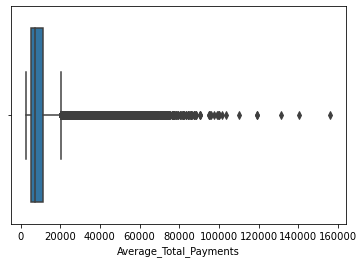

In [13]:
sns.boxplot(x = 'Average_Total_Payments', data = data) 

* From those 2 plots we can see 75% of the charges are under 10,000 dollar, but the highest charge amounts to 156,158

### Section 2.2: Count by State <a class="anchor" id="Section_22"></a>

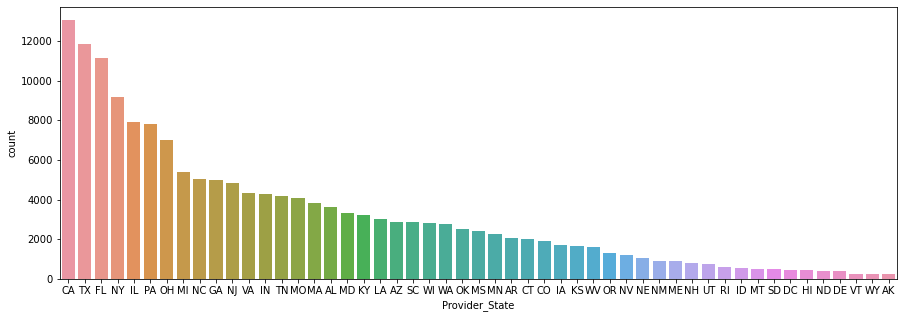

In [14]:
# data['Provider_State'].value_counts()
plt.figure(figsize=(15,5))
sns.countplot(x='Provider_State',data=data,order=data['Provider_State'].value_counts().index)
#plt.xticks(rotation = 90)
#ax = plt.gca()
#for p in ax.patches:
#    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#            fontsize=12, color='blue', ha='center', va='bottom')
plt.rcParams["axes.labelsize"] = 20

* From this histogram, California, Texas, and Florid has the highest number of hospital divisions.

### Section 2.3: Count of top 20 cities <a class="anchor" id="Section_23"></a>

In [15]:
data['Provider_Name'].value_counts()

GOOD SAMARITAN HOSPITAL                  633
ST JOSEPH MEDICAL CENTER                 427
MERCY MEDICAL CENTER                     357
MERCY HOSPITAL                           347
ST JOSEPH HOSPITAL                       343
                                        ... 
J PAUL JONES HOSPITAL                      1
GREATER BATON ROUGE SURGICAL HOSPITAL      1
FAIRWAY MEDICAL CENTER                     1
MONROE SURGICAL HOSPITAL                   1
EAGLEVILLE HOSPITAL                        1
Name: Provider_Name, Length: 3201, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'CHICAGO'),
  Text(1, 0, 'BALTIMORE'),
  Text(2, 0, 'HOUSTON'),
  Text(3, 0, 'PHILADELPHIA'),
  Text(4, 0, 'BROOKLYN'),
  Text(5, 0, 'SPRINGFIELD'),
  Text(6, 0, 'COLUMBUS'),
  Text(7, 0, 'LOS ANGELES'),
  Text(8, 0, 'NEW YORK'),
  Text(9, 0, 'DALLAS'),
  Text(10, 0, 'LAS VEGAS'),
  Text(11, 0, 'JACKSON'),
  Text(12, 0, 'JACKSONVILLE'),
  Text(13, 0, 'COLUMBIA'),
  Text(14, 0, 'WASHINGTON'),
  Text(15, 0, 'CINCINNATI'),
  Text(16, 0, 'MIAMI'),
  Text(17, 0, 'CLEVELAND'),
  Text(18, 0, 'BOSTON'),
  Text(19, 0, 'INDIANAPOLIS')])

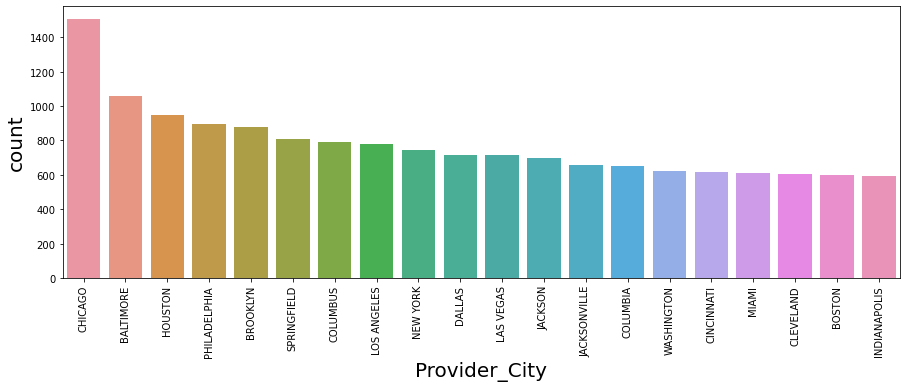

In [16]:
plt.figure(figsize=(15,5))
ch = sns.countplot(x='Provider_City',data=data,order=data['Provider_City'].value_counts()[:20].index)
plt.xticks(rotation = 90)
# junk = ch.set_xticklabels(ch.get_xticklabels()) # Use this line to collect the text prints
                          
#ax = plt.gca()
#plt.rcParams["axes.labelsize"] = 20


# b.set_xlabel("X Label",fontsize=30)
# b.set_ylabel("Y Label",fontsize=20)
# b.tick_params(labelsize=5)

# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#             fontsize=12, color='blue', ha='center', va='bottom')
# plt.rcParams["axes.labelsize"] = 20

* The above text are from matplotlib. 
* We really do not want to print the text. 
* You can assign them to "_" to throw them away.

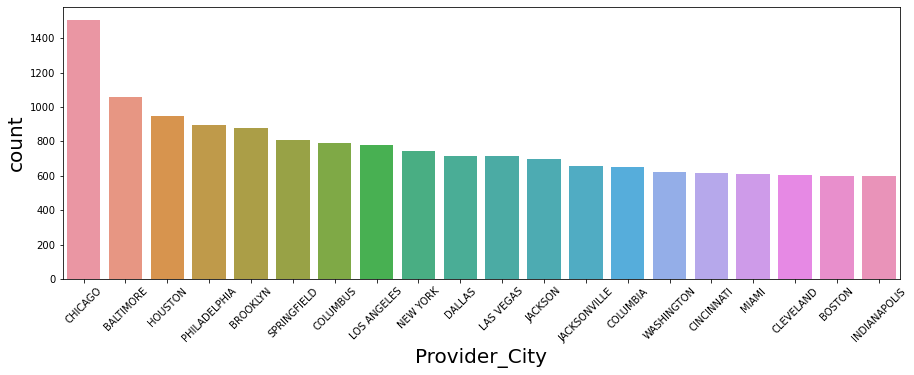

In [17]:
# This will look better
plt.figure(figsize=(15,5))
txt = data['Provider_City'].value_counts()[:20].index

chart = sns.countplot(
    x='Provider_City' ,data=data , order=txt
)

_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.rcParams["axes.labelsize"] = 10

#### Class discussion/Thought process:
- The following shows the average medicare payment by DRG. Does it make sense to compare "917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC" with "885 - PSYCHOSES"?

In [18]:
data.groupby('DRG')['Average_Total_Payments'].describe().reset_index().head()

,DRG,count,mean,std,min,25%,50%,75%,max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,1079.0,6960.534004,1477.873952,4968.00,6001.830,6582.890,7516.825,18420.56
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,1201.0,6706.276445,2033.965862,4194.09,5412.870,6093.750,7345.360,25519.43
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1659.0,13263.823032,3847.918207,8174.28,10762.220,12084.700,14424.325,50882.40
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,2269.0,7922.671141,2084.658336,5368.73,6626.270,7280.050,8503.060,26510.15
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1806.0,5713.985221,1342.538675,3916.41,4819.325,5326.025,6197.480,14744.05


## Section 3: Feature Engineering <a class="anchor" id="Section_3"></a>
[Back to Table of Content](#toc)
#### Discussions:
* Think of the objective: "Detect any hospital that may abuse the resources compared to the average of its peers of the same DRG and State."
* A feature should be able to "detect any hospital...". The above table does not have hospitals.
* The above table is the benchmark. Are they features?

#### Intuition:
* One or two hospitals may abuse their medical resources. If we compare a transaction to his hospital, we can find outliers.
* The spending for a Diagnosis Related Group (DRG) can be higher than others. It does not make sense to compare the spending of a DRG to another. An state can spend on various DRG, and we cannot claim anomalies just because the spending on one DRG is higher than another.
* So, we will aggregate to the state level and DRG level, then build features.
* Common sense tells us the comparison should be at "Provider_State" and "DRG" levels.

### Section 3.1: Create the benchmark table <a class="anchor" id="Section_31"></a>
#### Section 3.1.1: Average Total Payment by State & DRG <a class="anchor" id="Section_311"></a>
[Back to Table of Content](#toc)

In [19]:
benchmark1 = data.groupby(['Provider_State','DRG'])['Average_Total_Payments'].mean().reset_index()
benchmark1.columns = ['Provider_State','DRG','Avg_Pmts_ByStateDRG']
benchmark1.head()

,Provider_State,DRG,Avg_Pmts_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.950000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.000000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.010000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12555.548333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9275.867500


Text(0.5, 1.0, 'Average Total Payments for 066 DRG in States')

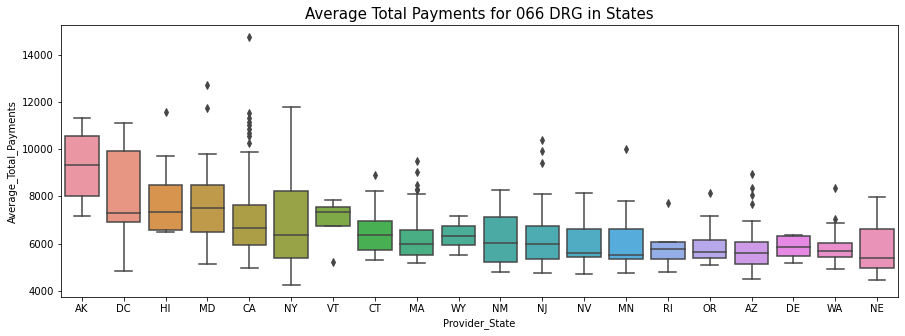

In [20]:
# visualize data with DRG 066 mean grouped by state and DRG ordering by mean descreasing
data_066 = data[data.DRG == '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC']
df_066_avg_st_drg = data_066.groupby('Provider_State').mean()
sorted_index = df_066_avg_st_drg.sort_values(by='Average_Total_Payments',ascending=False)[:20].index
plt.figure(figsize=(15,5))
sns.boxplot(x="Provider_State", y="Average_Total_Payments",
            order = sorted_index, data=data_066)
plt.title('Average Total Payments for 066 DRG in States',fontsize=15)

##### My thought process:
- I filter top 20 states of average total payments for 066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC DRG feature. From the boxplot, Alaska is the highest one with without outliers. 
- Each state varies in average total payment of DRG, like outliers, standard deviation etc. Therefore, further anomaly detection in average total payments by state and DRG is necessary.

#### Section 3.1.2: Avg Total Discharge by City <a class="anchor" id="Section_312"></a>
[Back to Table of Content](#toc)

In [171]:
# Setting benchmark
benchmark2 = data.groupby(['Provider_City'])['Total_Discharges'].mean().reset_index()
benchmark2.columns = ['Provider_City','Avg_Discharges_ByCity']
benchmark2.head()

,Provider_City,Avg_Discharges_ByCity
0,ABBEVILLE,28.277778
1,ABERDEEN,32.560748
2,ABILENE,38.572368
3,ABINGDON,37.698413
4,ABINGTON,68.939394


Text(0.5, 1.0, 'Median Total Payments for 066 DRG in States')

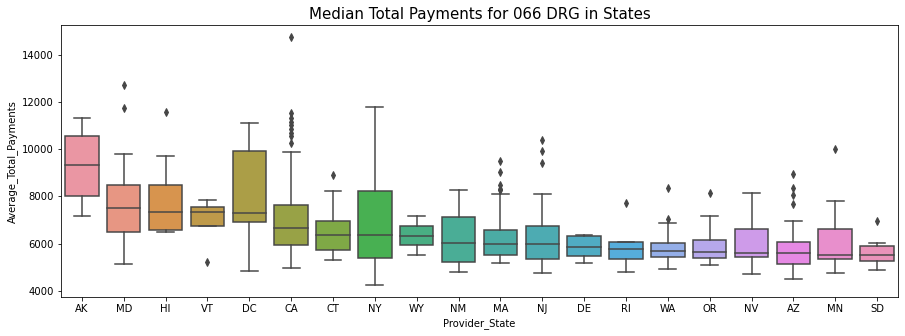

In [172]:
# visualize data with DRG 066 median grouped by state and DRG ordering by median descreasing
data_066 = data[data.DRG == '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC']
data_066_med_st_rdg = data_066.groupby('Provider_State').median()
sorted_index = data_066_med_st_rdg.sort_values(by='Average_Total_Payments',ascending=False)[:20].index

plt.figure(figsize=(15,5))
sns.boxplot(x="Provider_State", y="Average_Total_Payments",
            order=sorted_index, data=data_066)
plt.title('Median Total Payments for 066 DRG in States',fontsize=15)

##### My thought process:
- I filter top 20 states of median total payments for 066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC DRG feature. From the boxplot, Alaska is the highest one with without outliers. 
- Each state varies in average total payment of DRG, like outliers, standard deviation etc. Therefore, further anomaly detection in average total payments by state and DRG is necessary.
- Median is better than average when there are outliers, for example extreme values influences average a lot but not median.

#### Section 3.1.3: Average Total Discharges by State & DRG <a class="anchor" id="Section_313"></a>
[Back to Table of Content](#toc)

In [23]:
benchmark3 = data.groupby(['Provider_State','DRG'])['Total_Discharges'].\
                            mean().reset_index()
benchmark3.columns = ['Provider_State','DRG','Avg_Dischs_ByStateDRG']
benchmark3.sort_values(['Avg_Dischs_ByStateDRG']).head()

,Provider_State,DRG,Avg_Dischs_ByStateDRG
4197,SD,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,11.0
64,AK,419 - LAPAROSCOPIC CHOLECYSTECTOMY W/O C.D.E. ...,11.0
5060,WY,"391 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",11.0
1174,HI,536 - FRACTURES OF HIP & PELVIS W/O MCC,11.0
72,AK,482 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOIN...,11.0


Text(0.5, 1.0, 'Average Total Discharges for 066 DRG in States')

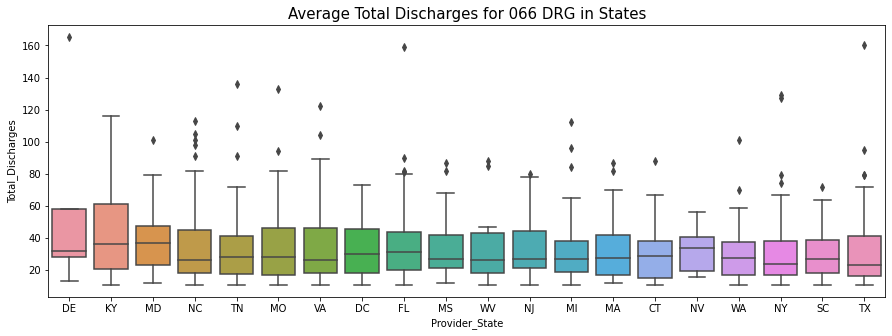

In [24]:
# visualize data with DRG 066 mean grouped by state and total discharges ordering by mean descreasing
data_066 = data[data.DRG == '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC']
data_066_avg_ct_td = data_066.groupby('Provider_State').mean()
sorted_index = data_066_avg_ct_td.sort_values(by='Total_Discharges',ascending=False)[:20].index

plt.figure(figsize=(15,5))
sns.boxplot(x="Provider_State", y="Total_Discharges",
            order=sorted_index, data=data_066)
plt.title('Average Total Discharges for 066 DRG in States',fontsize=15)

##### My thought process:
- I filter top 20 states of average total discharges for 066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC DRG feature. From the boxplot, Delaware is the highest one with without outliers, and the the 75th % of the data is closed to the highest.
- Each state varies in average total payment of DRG, like outliers, standard deviation etc. Therefore, further anomaly detection in average total discharges by state and DRG is necessary.

#### Section 3.1.4: Average Medicare by City & DRG <a class="anchor" id="Section_314"></a>
[Back to Table of Content](#toc)

In [175]:
# Setting benchmark
benchmark4 = data.groupby(['Provider_City','DRG'])['Average_Medicare_Payment'].mean().reset_index()
benchmark4.columns = ['Provider_City','DRG','Avg_Medicare_ByCityDRG']
benchmark4.head()

,Provider_City,DRG,Avg_Medicare_ByCityDRG
0,ABBEVILLE,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,NaN
1,ABBEVILLE,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,NaN
2,ABBEVILLE,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
3,ABBEVILLE,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
4,ABBEVILLE,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN


Text(0.5, 1.0, 'Median Total Discharges for 066 DRG in States')

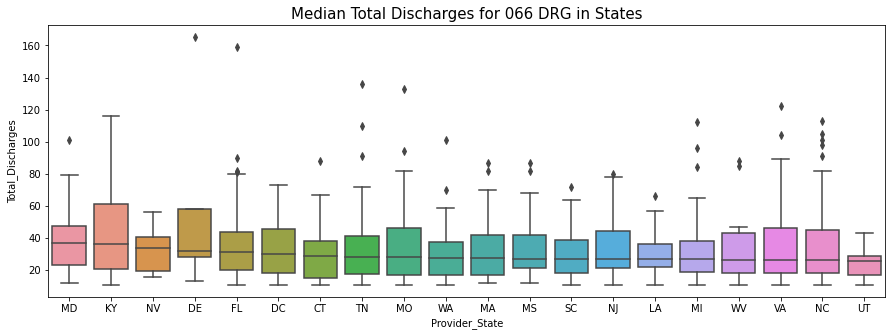

In [176]:
# visualize data with DRG 066 median grouped by state and total discharges ordering by mean descreasing
data_066 = data[data.DRG == '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC']
data_066_avg_ct_td = data_066.groupby('Provider_State').median()
sorted_index = data_066_avg_ct_td.sort_values(by='Total_Discharges',ascending=False)[:20].index

plt.figure(figsize=(15,5))
sns.boxplot(x="Provider_State", y="Total_Discharges",
            order=sorted_index, data=data_066)
plt.title('Median Total Discharges for 066 DRG in States',fontsize=15)

#### Section 3.1.5: Average Medicare Payments by State & DRG <a class="anchor" id="Section_315"></a>
[Back to Table of Content](#toc)

##### My thought process:
- I filter top 20 states of median total payments for 066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC DRG feature. From the boxplot, Maryland is the highest state.
- Each state varies in average total payment of DRG, like outliers, standard deviation etc. Therefore, further anomaly detection in average total discharges by state and DRG is necessary.
- Median is better than average when there are outliers, for example extreme values influences average a lot but not median.

In [27]:
benchmark5 = data.groupby(['Provider_State','DRG'])['Average_Medicare_Payment'].\
                            mean().reset_index()
benchmark5.columns = ['Provider_State','DRG','Avg_Medi_ByStateDRG']
benchmark5.head()

,Provider_State,DRG,Avg_Medi_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6413.780000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8081.540000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,20555.255000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,11140.963333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,8258.427500


Text(0.5, 1.0, 'Average Medicare Payments for 066 DRG in States')

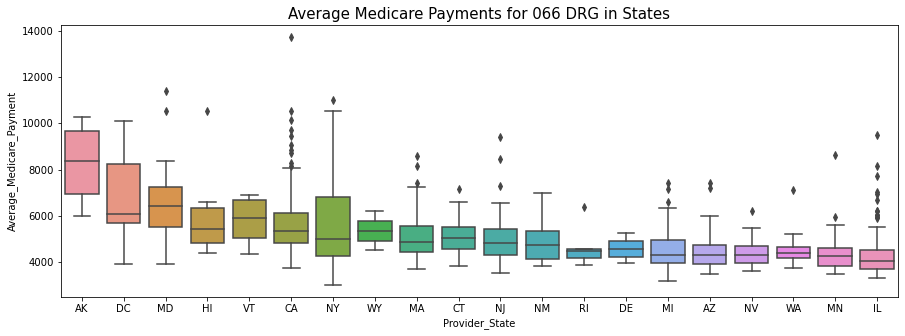

In [28]:
# visualize data with DRG 066 mean grouped by state and total discharges ordering by mean descreasing
data_066 = data[data.DRG == '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC']
data_066_avg_ct_td = data_066.groupby('Provider_State').mean()
sorted_index = data_066_avg_ct_td.sort_values(by='Average_Medicare_Payment',ascending=False)[:20].index

plt.figure(figsize=(15,5))
sns.boxplot(x="Provider_State", y="Average_Medicare_Payment",
            order=sorted_index, data=data_066)
plt.title('Average Medicare Payments for 066 DRG in States',fontsize=15)

##### My thought process:
- I filter top 20 states of average medicare payments for 066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC DRG feature. From the boxplot, Delaware is the highest one with without outliers, and the the 75th % of the data is closed to the highest.
- Each state varies in average total payment of DRG, like outliers, standard deviation etc. Therefore, further anomaly detection in average medicare payment by state and DRG is necessary.

#### Section 3.1.6: Median Medicare Payments by State & DRG <a class="anchor" id="Section_316"></a>
[Back to Table of Content](#toc)

In [207]:
# Setting benchmark
benchmark6 = data.groupby(['Provider_City'])['Average_Total_Payments'].mean().reset_index()
benchmark6.columns = ['Provider_City','Avg_Payment_ByCity']
benchmark6.head()

,Provider_City,Avg_Payment_ByCity
0,ABBEVILLE,6663.217222
1,ABERDEEN,9327.920561
2,ABILENE,8994.949539
3,ABINGDON,7173.921270
4,ABINGTON,10321.999293


Text(0.5, 1.0, 'Median Medicare Payments for 066 DRG in States')

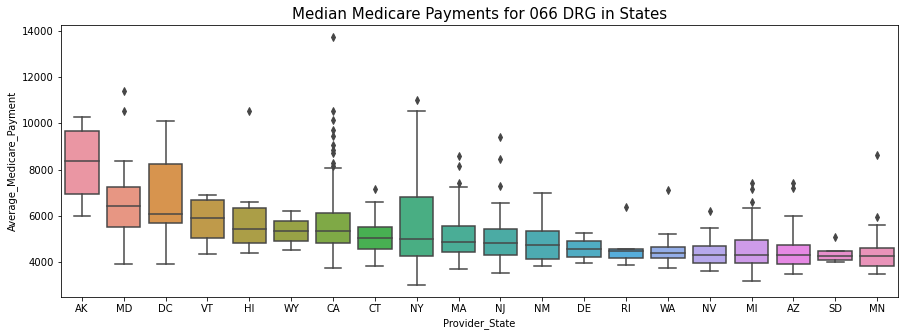

In [208]:
# visualize data with DRG 066 median grouped by state and total discharges ordering by mean descreasing
data_066 = data[data.DRG == '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC']
data_066_med_st_drg = data_066.groupby('Provider_State').median()
sorted_index = data_066_med_st_drg.sort_values(by='Average_Medicare_Payment',ascending=False)[:20].index

plt.figure(figsize=(15,5))
sns.boxplot(x="Provider_State", y="Average_Medicare_Payment",
            order=sorted_index, data=data_066)
plt.title('Median Medicare Payments for 066 DRG in States',fontsize=15)

##### My thought process:
- I filter top 20 states of median medicare payments for 066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC DRG feature. From the boxplot, Alaska is the highest one without outliers.
- Each state varies in average total payment of DRG, like outliers, standard deviation etc. Therefore, further anomaly detection in average medicare payment by state and DRG is necessary.
- Median is better than average when there are outliers, for example extreme values influences average a lot but not median.

#### Section 3.1.7: Average Total Payments by Region & DRG <a class="anchor" id="Section_317"></a>
[Back to Table of Content](#toc)

In [31]:
benchmark7 = data.groupby(['Hospital_referral_region_desp','DRG'])['Average_Total_Payments'].\
                            mean().reset_index()
benchmark7.columns = ['Hospital_referral_region_desp','DRG','Avg_Pmts_ByRegionDRG']
benchmark7.sort_values(['Avg_Pmts_ByRegionDRG']).head()

,Hospital_referral_region_desp,DRG,Avg_Pmts_ByRegionDRG
8149,IA - Dubuque,313 - CHEST PAIN,2944.0200
6649,FL - Sarasota,313 - CHEST PAIN,2987.1675
27443,TX - Waco,303 - ATHEROSCLEROSIS W/O MCC,3017.0000
6149,FL - Ocala,313 - CHEST PAIN,3021.9850
8147,IA - Dubuque,310 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDER...,3055.0500


Text(0.5, 1.0, 'Average Total Payments for 066 DRG in Regions')

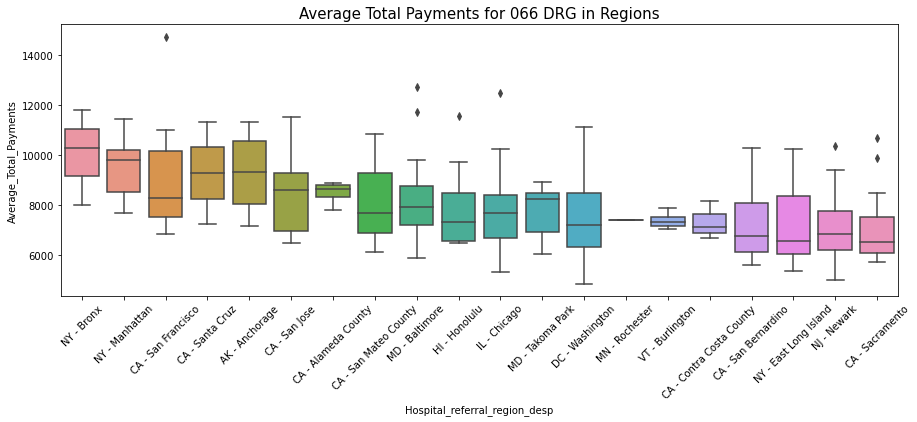

In [32]:
# visualize data with DRG 066 mean grouped by state and total discharges ordering by mean descreasing
data_066 = data[data.DRG == '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC']
data_066_avg_ct_td = data_066.groupby('Hospital_referral_region_desp').mean()
sorted_index = data_066_avg_ct_td.sort_values(by='Average_Total_Payments',ascending=False)[:20].index

plt.figure(figsize=(15,5))

g = sns.boxplot(x="Hospital_referral_region_desp", y="Average_Total_Payments",
            order=sorted_index, data=data_066)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.title('Average Total Payments for 066 DRG in Regions',fontsize=15)

##### My thought process:
- I filter top 20 hospital referral region desp of average total payments for 066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC DRG feature. From the boxplot, NY-Bronx is the highest one without outliers.
- Each region varies in average total payment of DRG, like outliers, standard deviation etc. Therefore, further anomaly detection in average total payment by region and DRG is necessary.

#### Section 3.1.8: Average Total Discharges by Region & DRG <a class="anchor" id="Section_318"></a>
[Back to Table of Content](#toc)

In [33]:
benchmark8 = data.groupby(['Hospital_referral_region_desp','DRG'])['Total_Discharges'].\
                            mean().reset_index()
benchmark8.columns = ['Hospital_referral_region_desp','DRG','Tot_Dischs_ByRegionDRG']
benchmark8.sort_values(['Tot_Dischs_ByRegionDRG']).head()

,Hospital_referral_region_desp,DRG,Tot_Dischs_ByRegionDRG
3842,CA - Stockton,301 - PERIPHERAL VASCULAR DISORDERS W/O CC/MCC,11.0
6719,FL - St. Petersburg,202 - BRONCHITIS & ASTHMA W CC/MCC,11.0
7801,IA - Cedar Rapids,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,11.0
29676,WI - La Crosse,"563 - FX, SPRN, STRN & DISL EXCEPT FEMUR, HIP,...",11.0
16523,MS - Oxford,238 - MAJOR CARDIOVASC PROCEDURES W/O MCC,11.0


Text(0.5, 1.0, 'Average Total Discharges for DRG 066 by Hospital referral region desp')

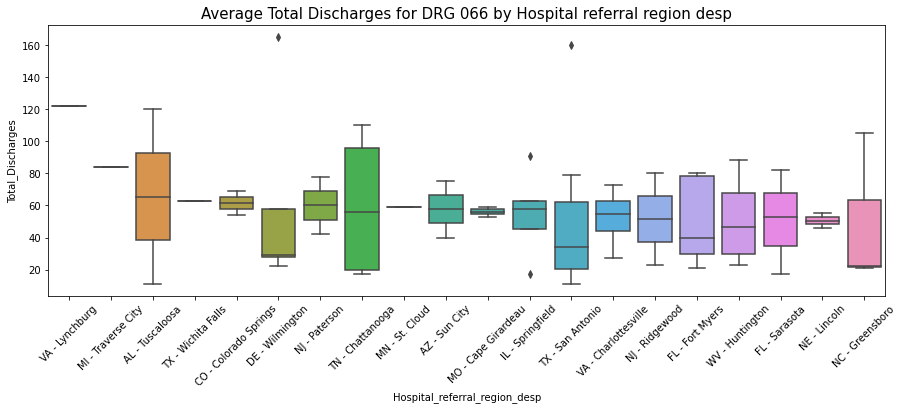

In [34]:
# visualize data with DRG 066 mean grouped by state and total discharges ordering by mean descreasing
data_066 = data[data.DRG == '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC']
data_066_avg_ct_td = data_066.groupby('Hospital_referral_region_desp').mean()
sorted_index = data_066_avg_ct_td.sort_values(by='Total_Discharges',ascending=False)[:20].index

plt.figure(figsize=(15,5))

g = sns.boxplot(x="Hospital_referral_region_desp", y="Total_Discharges",
            order=sorted_index, data=data_066)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.title('Average Total Discharges for DRG 066 by Hospital referral region desp',fontsize=15)

##### My thought process:
- I filter top 20 hospital referral region desp of average total discharges for 066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC DRG feature. From the boxplot, VA-Lychburg is the highest one, and its distribution is very condensed.
- Each region varies in average total discharges of DRG, like outliers, standard deviation etc. Therefore, further anomaly detection in average total payment by region and DRG is necessary.

#### Section 3.1.9: Average Medicare Payments by Region & DRG <a class="anchor" id="Section_319"></a>
[Back to Table of Content](#toc)

In [35]:
benchmark9 = data.groupby(['Hospital_referral_region_desp','DRG'])['Average_Medicare_Payment'].\
                            mean().reset_index()
benchmark9.columns = ['Hospital_referral_region_desp','DRG','Avg_Medi_Payment_ByRegionDRG']
benchmark9.sort_values(['Avg_Medi_Payment_ByRegionDRG']).head()

,Hospital_referral_region_desp,DRG,Avg_Medi_Payment_ByRegionDRG
8149,IA - Dubuque,313 - CHEST PAIN,1811.240
10544,IN - Lafayette,305 - HYPERTENSION W/O MCC,1855.070
6520,FL - Pensacola,203 - BRONCHITIS & ASTHMA W/O CC/MCC,1858.780
5220,FL - Bradenton,203 - BRONCHITIS & ASTHMA W/O CC/MCC,1940.680
6149,FL - Ocala,313 - CHEST PAIN,1942.905


Text(0.5, 1.0, 'Average Medicare Payment for DRG 066 by Hospital referral region desp')

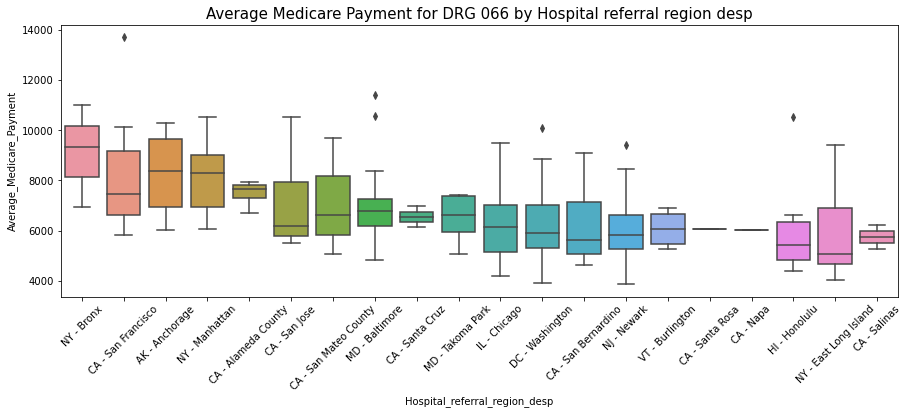

In [36]:
# visualize data with DRG 066 mean grouped by state and total discharges ordering by mean descreasing
data_066 = data[data.DRG == '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC']
data_066_avg_ct_td = data_066.groupby('Hospital_referral_region_desp').mean()
sorted_index = data_066_avg_ct_td.sort_values(by='Average_Medicare_Payment',ascending=False)[:20].index

plt.figure(figsize=(15,5))

g = sns.boxplot(x="Hospital_referral_region_desp", y="Average_Medicare_Payment",
            order=sorted_index, data=data_066)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.title('Average Medicare Payment for DRG 066 by Hospital referral region desp',fontsize=15)

##### My thought process:
- I filter top 20 hospital referral region desp of average medicare payments for 066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC DRG feature. From the boxplot, NY-Bronx is the highest one without outliers.
- Each region varies in average total discharges of DRG, like outliers, standard deviation etc. Therefore, further anomaly detection in average total payment by region and DRG is necessary.

#### Section 3.1.10: Average Total Payments by Region & DRG <a class="anchor" id="Section_3110"></a>
[Back to Table of Content](#toc)

In [37]:
data['Total_Payments'] = data['Average_Total_Payments'] * data['Total_Discharges']
benchmark10 = data.groupby(['Hospital_referral_region_desp','DRG'])['Total_Payments'].\
                            mean().reset_index()
benchmark10.columns = ['Hospital_referral_region_desp','DRG','Tot_Pmts_ByRegionDRG']
benchmark10.sort_values(['Tot_Pmts_ByRegionDRG']).head()

,Hospital_referral_region_desp,DRG,Tot_Pmts_ByRegionDRG
12144,LA - Lake Charles,305 - HYPERTENSION W/O MCC,35513.94
27443,TX - Waco,303 - ATHEROSCLEROSIS W/O MCC,36204.00
22796,PA - Danville,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,36483.92
8157,IA - Dubuque,379 - G.I. HEMORRHAGE W/O CC/MCC,36670.92
15620,MO - Columbia,203 - BRONCHITIS & ASTHMA W/O CC/MCC,37229.94


Text(0.5, 1.0, 'Average Total Payments for 066 DRG in Regions')

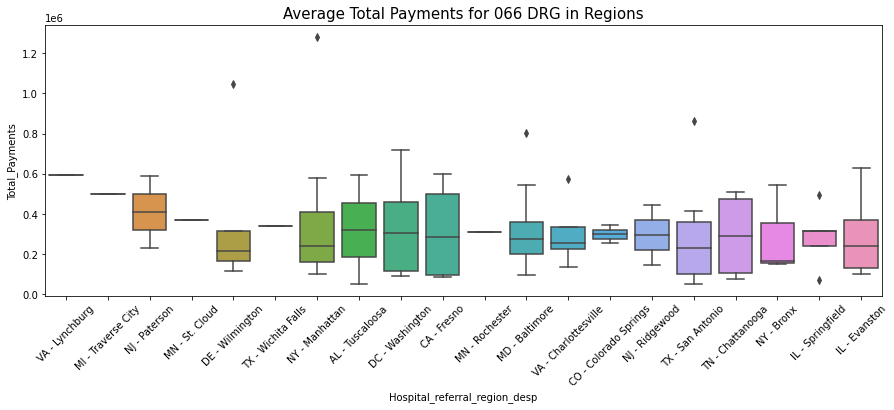

In [38]:
# visualize data with DRG 066 mean grouped by state and total discharges ordering by mean descreasing
data_066 = data[data.DRG == '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC']
data_066_avg_ct_td = data_066.groupby('Hospital_referral_region_desp').mean()
sorted_index = data_066_avg_ct_td.sort_values(by='Total_Payments',ascending=False)[:20].index

plt.figure(figsize=(15,5))

g = sns.boxplot(x="Hospital_referral_region_desp", y="Total_Payments",
            order=sorted_index, data=data_066)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.title('Average Total Payments for 066 DRG in Regions',fontsize=15)

##### My thought process:
- I filter top 20 hospital referral region desp of average total payments for 066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC DRG feature. From the boxplot, VA-Lynchburg is the highest, and its data is very condensed.
- Each region varies in total payment of DRG, like outliers, standard deviation etc. Therefore, further anomaly detection in total payment by region and DRG is necessary.

### Section 3.2: Create features <a class="anchor" id="Section_32"></a>
#### Intuition:

- One or two hospitals may abuse the medical system. If we compare a hospitals to their state, we can find outliers.
- The spending for a DRG can be higher than others. It does not make sense to compare the spending of a Diagnosis Related Group (DRG) to another. An state can spend on DRG, and we cannot claim anomalies just because the spending on one DRG is higher than another since different states have various dissimilarities, including policies, economy etc.
- So, we will aggregate to the state level and DRG level, then build features.
- Common sense tells us the comparison should be at "Provider_State" and "DRG" levels.

#### 3.2.1 Feature 1: The ratio to average payment by state and DRG <a class="anchor" id="Section_321"></a>
[Back to Table of Content](#toc)
##### My thought process:
- The ratio to average payment by state and DRG is a good feature since hospitals which share the state and DRG are more likely to similar level of medical expense. If the ratio to average amount of hospitals way above the average, we should check if it is anomolies.

In [39]:
# add the new feature average spending to the dataset 
df1 = pd.merge(data, benchmark1, how='left', on=['Provider_State', 'DRG'])
# Feature 1: ratio of amount spending and avergae spending by state and DRG
df1['state_drg_avg_ratio_amount'] = np.where(df1['Avg_Pmts_ByStateDRG']==0, 0, df1['Average_Total_Payments'] / df1['Avg_Pmts_ByStateDRG'])
df1['state_drg_avg_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.195274
min           0.384805
25%           0.880824
50%           0.956830
75%           1.064688
max           7.857934
Name: state_drg_avg_ratio_amount, dtype: float64

##### My thought process:
- The above percentile motivates me to cut by percentile for plotting
- I set the percentile as [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1].

In [40]:
# cut by percentile for plotting
var = 'state_drg_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df1[binned_var] = pd.qcut(df1[var], percentile)
df1[['state_drg_avg_ratio_amount_D']]

,state_drg_avg_ratio_amount_D
0,"(0.957, 1.102]"
1,"(0.957, 1.102]"
2,"(0.864, 0.957]"
3,"(0.864, 0.957]"
4,"(0.957, 1.102]"
...,...
163060,"(0.785, 0.864]"
163061,"(0.864, 0.957]"
163062,"(1.102, 1.383]"
163063,"(1.383, 1.663]"


Text(0.5, 1.0, 'Figure 3.1.1 Distribution of state_drg_avg_ratio_amount')

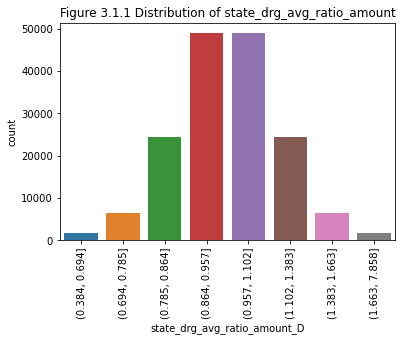

In [41]:
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x='state_drg_avg_ratio_amount_D', data=df1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Figure 3.1.1 Distribution of state_drg_avg_ratio_amount')

##### My thought process:
- Now we have identified extreme spending compared to the same state and DRG.
- If the transactions are 2 times of the average, it should be anomalies since we can see from above description that standard deviation is high. Furthermore, the distribution plt indicates that there are a few in the far end. Therefore, above the 2 times of the average should be monitor to identified whether it is anomalies.

In [42]:
df1[df1['state_drg_avg_ratio_amount']>2].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Payments,Avg_Pmts_ByStateDRG,state_drg_avg_ratio_amount,state_drg_avg_ratio_amount_D
280,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,140008,LOYOLA GOTTLIEB MEMORIAL HOSPITAL,701 WEST NORTH AVE,MELROSE PARK,IL,60160,IL - Melrose Park,16,18420.56,4401.87,294728.96,7376.789808,2.497097,"(1.663, 7.858]"
294,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,140080,RHC ST FRANCIS HOSPITAL,355 RIDGE AVE,EVANSTON,IL,60202,IL - Evanston,12,17347.00,6934.08,208164.00,7376.789808,2.351565,"(1.663, 7.858]"
1172,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50276,CONTRA COSTA REGIONAL MEDICAL CENTER,2500 ALHAMBRA AVE,MARTINEZ,CA,94553,CA - Contra Costa County,23,19239.30,18363.08,442503.90,8528.764103,2.255813,"(1.663, 7.858]"
1191,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,16,25519.43,22553.56,408310.88,8528.764103,2.992160,"(1.663, 7.858]"
1258,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,100022,JACKSON MEMORIAL HOSPITAL,1611 NW 12TH AVE,MIAMI,FL,33136,FL - Miami,29,12789.27,11467.62,370888.83,5715.700980,2.237568,"(1.663, 7.858]"


##### Conclusion:
- This feature identifies the anomalies by comparing a payment amount to an average amount of same the state and DGR. Here, those amounts more than 2 times the average are determined to be the anomalies, and potential frauds.

#### Feature 2: The ratio to average total discharges by city <a class="anchor" id="Section_322"></a>
[Back to Table of Content](#toc)
##### My thought process:
- The ratio to median payment by state and DRG is a good feature since hospitals which share the state and DRG are more likely to similar level of medical expense. Median is also crucial because average can be highly influenced by a small portion of extreme high or low value. If the ratio to median amount of hospitals way above the median, we should check if it is anomolies. 

In [195]:
# Filter out potential anomalies
df2 = pd.merge(data, benchmark2, how='left', on=['Provider_City'])
df2['provider_city_disc_ratio']=df2['Total_Discharges'] / df2['Avg_Discharges_ByCity']
# df2[df2['provider_city_disc_ratio']<0.5].head()

##### My thought process:
- The above percentile motivates me to cut by percentile for plotting
- I set the percentile as [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1].

In [197]:
# cut by percentile for plotting
var = 'provider_city_disc_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df2[binned_var] = pd.qcut(df2[var], percentile)
df2[['provider_city_disc_ratio_D']]

,provider_city_disc_ratio_D
0,"(1.385, 2.652]"
1,"(0.407, 0.692]"
2,"(0.407, 0.692]"
3,"(0.407, 0.692]"
4,"(0.407, 0.692]"
...,...
163060,"(0.692, 1.385]"
163061,"(0.0718, 0.209]"
163062,"(0.692, 1.385]"
163063,"(0.407, 0.692]"


Text(0.5, 1.0, 'Figure 3.1.2 Distribution of state_drg_med_ratio_amount')

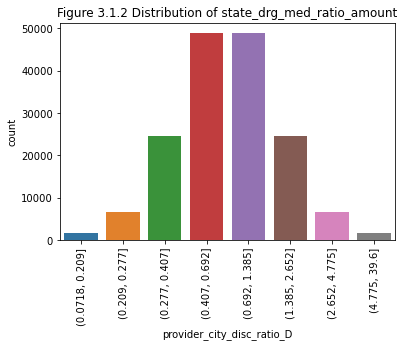

In [198]:
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x='provider_city_disc_ratio_D', data=df2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Figure 3.1.2 Distribution of provider_city_disc_ratio')

##### Thought process:
- Now, we have identified extreme spending compared to the same state and DRG.
- The ratio of amount spending and median amount by state and DRG category larger than 2 times of the median can be anomalies.

In [199]:
df2[df2['provider_city_disc_ratio']>2.65].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Payments,Avg_Discharges_ByCity,provider_city_disc_ratio,provider_city_disc_ratio_D
394,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,170186,KANSAS HEART HOSPITAL,3601 NORTH WEBB ROAD,WICHITA,KS,67226,KS - Wichita,190,5332.51,4311.03,1013176.90,56.812057,3.344361,"(2.652, 4.775]"
440,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,190263,HEART HOSPITAL OF LAFAYETTE,1105 KALISTE SALOOM ROAD,LAFAYETTE,LA,70508,LA - Lafayette,110,5348.60,4115.00,588346.00,35.832569,3.069833,"(2.652, 4.775]"
795,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,370215,OKLAHOMA HEART HOSPITAL,4050 WEST MEMORIAL ROAD,OKLAHOMA CITY,OK,73120,OK - Oklahoma City,170,5351.27,4286.02,909715.90,47.202443,3.601508,"(2.652, 4.775]"
801,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,380018,ROGUE VALLEY MEDICAL CENTER,2825 E BARNETT ROAD,MEDFORD,OR,97504,OR - Medford,93,6694.95,5404.56,622630.35,32.868613,2.829447,"(2.652, 4.775]"
2329,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,30024,ST JOSEPH'S HOSPITAL AND MEDICAL CENTER,350 WEST THOMAS ROAD,PHOENIX,AZ,85013,AZ - Phoenix,100,15845.98,14974.54,1584598.00,34.199282,2.924038,"(2.652, 4.775]"


##### Conclusion:
- This feature identifies the anomalies by comparing a transaction amount to a median amount at the state and DRG level. Here, these amounts which are more than 2 times of the median are determined to be the anomalies, and potential frauds.

#### 3.2.3 Feature 3: The ratio to total discharges by state and DRG <a class="anchor" id="Section_323"></a>
[Back to Table of Content](#toc)
##### My thought process:
- The ratio to total discharges by state and DRG is a good feature since hospitals which share the state and DRG are more likely to similar level of total discharges. If the ratio to total discharges way above the average, we should check if it is anomolies.

In [47]:
# add the new feature average spending to the dataset 
df3 = pd.merge(data, benchmark3, how='left', on=['Provider_State', 'DRG'])
# Feature 3: ratio of amount spending and avergae spending by state and total discharges
df3['st_td_avg_ratio_amount'] = np.where(df3['Avg_Dischs_ByStateDRG']==0, 0, df3['Average_Medicare_Payment'] / df3['Avg_Dischs_ByStateDRG'])
df3['st_td_avg_ratio_amount'] = df3['st_td_avg_ratio_amount'].fillna(-1)
df3['st_td_avg_ratio_amount'].describe()

count    163065.000000
mean        267.913400
std         311.044960
min          10.605349
25%         101.826118
50%         169.378365
75%         307.879820
max        8083.787595
Name: st_td_avg_ratio_amount, dtype: float64

##### My thought process:
- The above percentile motivates me to cut by percentile for plotting
- I set the percentile as [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1].

In [48]:
# cut by percentile for plotting
var = 'st_td_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df3[binned_var] = pd.qcut(df3[var],percentile)
df3[['st_td_avg_ratio_amount_D']]

,st_td_avg_ratio_amount_D
0,"(90.957, 169.378]"
1,"(90.957, 169.378]"
2,"(90.957, 169.378]"
3,"(90.957, 169.378]"
4,"(90.957, 169.378]"
...,...
163060,"(90.957, 169.378]"
163061,"(90.957, 169.378]"
163062,"(90.957, 169.378]"
163063,"(169.378, 356.29]"


Text(0.5, 1.0, 'Figure 3.1.3 Distribution of st_drg_avg_ratio_amount')

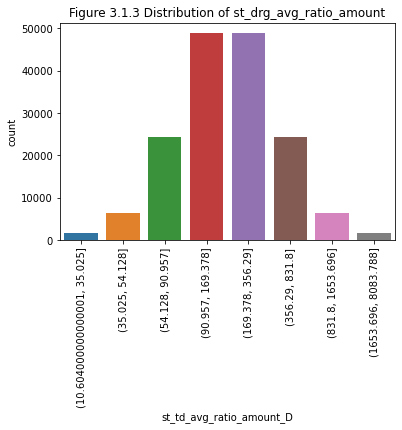

In [49]:
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x='st_td_avg_ratio_amount_D', data=df3)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Figure 3.1.3 Distribution of st_drg_avg_ratio_amount')

##### Thought process:
- Now, we have identified extreme spending compared to the same state and DRG.
- The ratio of amount spending and average amount by name and DRG category larger than 830 times of the average can be anomalies, and potential frauds.

In [50]:
df3[df3['st_td_avg_ratio_amount']>830].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Payments,Avg_Dischs_ByStateDRG,st_td_avg_ratio_amount,st_td_avg_ratio_amount_D
1172,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50276,CONTRA COSTA REGIONAL MEDICAL CENTER,2500 ALHAMBRA AVE,MARTINEZ,CA,94553,CA - Contra Costa County,23,19239.30,18363.08,442503.90,18.833333,975.030796,"(831.8, 1653.696]"
1191,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,16,25519.43,22553.56,408310.88,18.833333,1197.534159,"(831.8, 1653.696]"
2319,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,20012,FAIRBANKS MEMORIAL HOSPITAL,1650 COWLES STREET,FAIRBANKS,AK,99701,AK - Anchorage,11,25443.00,24413.90,279873.00,22.500000,1085.062222,"(831.8, 1653.696]"
2428,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,SAN FRANCISCO GENERAL HOSPITAL,1001 POTRERO AVENUE,SAN FRANCISCO,CA,94110,CA - San Francisco,19,35275.57,34455.00,670235.83,31.878788,1080.812738,"(831.8, 1653.696]"
2461,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50348,UNIVERSITY OF CALIFORNIA IRVINE MED CENTER,101 CITY DRIVE SOUTH,ORANGE,CA,92868,CA - Orange County,26,33918.23,33054.88,881873.98,31.878788,1036.892624,"(831.8, 1653.696]"


##### Conclusion:
- This feature identifies the anomalies by comparing the ratio to total discharges by the state and DRG level. Here, those amounts which are more than 830 times of the average are determined to be the anomalies, and potential frauds.

#### Feature 4: The ratio to average medicare by city and DRG <a class="anchor" id="Section_324"></a>
[Back to Table of Content](#toc)
##### My thought process:
- The ratio to median total discharges by state and DRG is a good feature since hospitals which share the state and DRG are more likely to similar level of medical expense. Median is also crucial because average can be highly influenced by a small portion of extreme high or low value. If the ratio to median amount of hospitals way above the median, we should check if it is anomolies. 

In [189]:
# Filter out potential anomalies
df4 = pd.merge(data, benchmark4, how='left', on=['Provider_City','DRG'])
df4['provider_city_drg_medi_ratio']=df4['Average_Medicare_Payment'] / df4['Avg_Medicare_ByCityDRG']

##### My thought process:
- The above percentile motivates me to cut by percentile for plotting
- I set the percentile as [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1].

In [190]:
# cut by percentile for plotting
var = 'provider_city_drg_medi_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df4[binned_var] = pd.qcut(df4[var], percentile)

Text(0.5, 1.0, 'Figure 3.1.4 Distribution of st_td_med_ratio_amount')

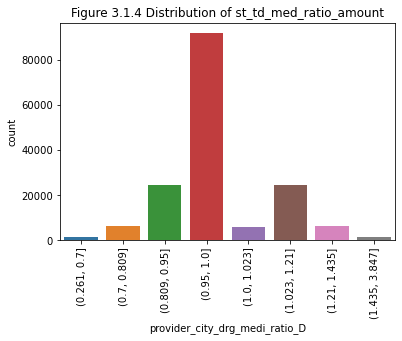

In [191]:
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x='provider_city_drg_medi_ratio_D', data=df4)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Figure 3.1.4 Distribution of provider_city_drg_medi_ratio')

##### Thought process:
- Now, we have identified extreme spending compared to the same state and total discharges.
- The ratio of total discharges by state and DRG category larger than 3 times of the median can be anomalies, and potential frauds.

In [194]:
df4[df4['provider_city_drg_medi_ratio']>1.2].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Payments,Avg_Medicare_ByCityDRG,provider_city_drg_medi_ratio,provider_city_drg_medi_ratio_D
7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,8031.12,5858.50,256995.84,4592.038333,1.275795,"(1.21, 1.435]"
59,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40078,NATIONAL PARK MEDICAL CENTER,1910 MALVERN AVENUE,HOT SPRINGS,AR,71901,AR - Little Rock,18,9838.11,8533.83,177085.98,6646.765000,1.283907,"(1.21, 1.435]"
73,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50058,GLENDALE MEM HOSPITAL & HLTH CENTER,1420 S CENTRAL AVE,GLENDALE,CA,91204,CA - Los Angeles,11,11082.18,10056.00,121903.98,7391.853333,1.360417,"(1.21, 1.435]"
117,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50496,JOHN MUIR MEDICAL CENTER - CONCORD CAMPUS,2540 EAST ST,CONCORD,CA,94520,CA - Contra Costa County,20,8485.00,7582.60,169700.00,5687.770000,1.333141,"(1.21, 1.435]"
202,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,100113,SHANDS HOSPITAL AT THE UNIVERSITY OF FLORIDA,1600 SW ARCHER RD,GAINESVILLE,FL,32610,FL - Gainesville,17,9370.64,7588.52,159300.88,5657.723333,1.341267,"(1.21, 1.435]"


##### Conclusion:
- This feature identifies the anomalies by comparing a transaction amount to a median amount at the state and total discharges level. Here, those amounts which are more than 3 times of the median are determined to be the anomalies, and potential frauds.

#### 3.2.5 Feature 5: The ratio to average medicare payment by state and DRG <a class="anchor" id="Section_325"></a>
[Back to Table of Content](#toc)
##### My thought process:
- The ratio to average medicare payment by state and DRG is a good feature since hospitals which share the state and DRG are more likely to similar level of medical expense. If the ratio to average mdeicare amount of hospitals way above the average, we should check if it is anomolies.

In [55]:
# add the new feature average spending to the dataset 
df5 = pd.merge(data, benchmark5, how='left', on=['Provider_State', 'DRG'])
# Feature 5: ratio of amount spending and avergae medicare spending by state and DRG
df5['state_drg_avg_medi_ratio_amount'] = np.where(df5['Avg_Medi_ByStateDRG']==0, 0, df5['Average_Medicare_Payment'] / df5['Avg_Medi_ByStateDRG'])
df5['state_drg_avg_medi_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.215091
min           0.339831
25%           0.868395
50%           0.954250
75%           1.071483
max           5.174415
Name: state_drg_avg_medi_ratio_amount, dtype: float64

##### My thought process:
- The above percentile motivates me to cut by percentile for plotting
- I set the percentile as [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1].

In [56]:
# cut by percentile for plotting
var = 'state_drg_avg_medi_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df5[binned_var] = pd.qcut(df5[var], percentile)
df5[['state_drg_avg_medi_ratio_amount_D']]

,state_drg_avg_medi_ratio_amount_D
0,"(0.954, 1.111]"
1,"(0.954, 1.111]"
2,"(0.954, 1.111]"
3,"(0.849, 0.954]"
4,"(0.954, 1.111]"
...,...
163060,"(0.757, 0.849]"
163061,"(0.655, 0.757]"
163062,"(0.954, 1.111]"
163063,"(1.744, 5.174]"


Text(0.5, 1.0, 'Figure 3.1.5 Distribution of state_drg_avg_medi_ratio_amount')

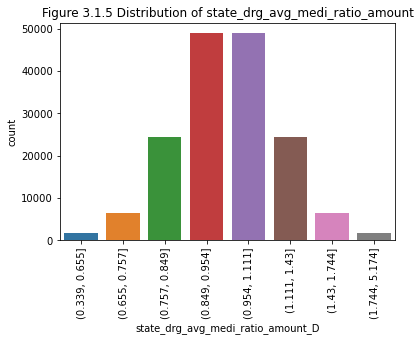

In [57]:
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x='state_drg_avg_medi_ratio_amount_D', data=df5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Figure 3.1.5 Distribution of state_drg_avg_medi_ratio_amount')

##### My thought process:
- Now we have identified extreme spending compared to the same state and DRG.
- If the transactions are 2 times of the average, it should be anomalies since we can see from above description that standard deviation is high. Furthermore, the distribution plt indicates that there are a few in the far end. Therefore, above the 2 times of the average should be monitor to identified whether it is anomalies.

In [58]:
df5[df5['state_drg_avg_medi_ratio_amount']>2].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Payments,Avg_Medi_ByStateDRG,state_drg_avg_medi_ratio_amount,state_drg_avg_medi_ratio_amount_D
1172,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50276,CONTRA COSTA REGIONAL MEDICAL CENTER,2500 ALHAMBRA AVE,MARTINEZ,CA,94553,CA - Contra Costa County,23,19239.30,18363.08,442503.90,7506.485256,2.446295,"(1.744, 5.174]"
1191,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,16,25519.43,22553.56,408310.88,7506.485256,3.004543,"(1.744, 5.174]"
1258,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,100022,JACKSON MEMORIAL HOSPITAL,1611 NW 12TH AVE,MIAMI,FL,33136,FL - Miami,29,12789.27,11467.62,370888.83,4759.258922,2.409539,"(1.744, 5.174]"
1417,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,140150,UNIVERSITY OF ILLINOIS HOSPITAL,1740 WEST TAYLOR ST SUITE 1400,CHICAGO,IL,60612,IL - Chicago,16,12215.06,11442.81,195440.96,5428.791471,2.107801,"(1.744, 5.174]"
1554,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,83,24865.61,22873.49,2063845.63,8352.411622,2.738549,"(1.744, 5.174]"


##### Conclusion:
- This feature identifies the anomalies by comparing a payment amount to an average amount of same the state and DGR. Here, those amounts more than 2 times the average are determined to be the anomalies, and potential frauds.

#### Feature 6: The ratio to median medicare payment by state and DRG <a class="anchor" id="Section_326"></a>
[Back to Table of Content](#toc)
##### My thought process:
- The ratio to median medicare payment by state and DRG is a good feature since hospitals which share the state and DRG are more likely to similar level of medical expense. Median is also crucial because average can be highly influenced by a small portion of extreme high or low value. If the ratio to median amount of hospitals way above the median, we should check if it is anomolies. 

In [210]:
# Filter out potential anomalies
df6 = pd.merge(data, benchmark6, how='left', on=['Provider_City'])
df6['provider_city_ratio']=df6['Average_Total_Payments'] / df6['Avg_Payment_ByCity']

##### My thought process:
- The above percentile motivates me to cut by percentile for plotting
- I set the percentile as [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1].

In [211]:
# cut by percentile for plotting
var = 'provider_city_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df6[binned_var] = pd.qcut(df6[var], percentile)
df6[['provider_city_ratio_D']]

,provider_city_ratio_D
0,"(0.534, 0.774]"
1,"(0.774, 1.305]"
2,"(0.534, 0.774]"
3,"(0.534, 0.774]"
4,"(0.534, 0.774]"
...,...
163060,"(0.42, 0.534]"
163061,"(0.359, 0.42]"
163062,"(0.534, 0.774]"
163063,"(0.534, 0.774]"


Text(0.5, 1.0, 'Figure 3.1.6 Distribution of provider_city_ratio')

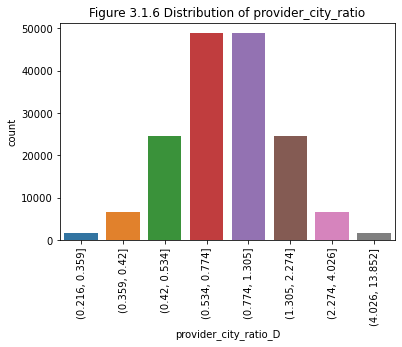

In [212]:
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x='provider_city_ratio_D', data=df6)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Figure 3.1.6 Distribution of provider_city_ratio')

##### Thought process:
- Now, we have identified extreme spending compared to the same state and DRG.
- The ratio of amount spending and median amount by state and DRG category larger than 2 times of the median can be anomalies.

In [214]:
df6[df6['provider_city_ratio']>2.2].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Payments,Avg_Payment_ByCity,provider_city_ratio,provider_city_ratio_D
2461,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50348,UNIVERSITY OF CALIFORNIA IRVINE MED CENTER,101 CITY DRIVE SOUTH,ORANGE,CA,92868,CA - Orange County,26,33918.23,33054.88,881873.98,12984.097945,2.612290,"(2.274, 4.026]"
2468,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50376,LAC/HARBOR-UCLA MED CENTER,1000 W CARSON ST,TORRANCE,CA,90509,CA - Los Angeles,13,26668.61,25391.61,346691.93,12005.861168,2.221299,"(1.305, 2.274]"
2490,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50498,SUTTER AUBURN FAITH HOSPITAL,11815 EDUCATION STREET,AUBURN,CA,95603,CA - Sacramento,14,18589.78,9770.57,260256.92,8308.245093,2.237510,"(1.305, 2.274]"
2574,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,90003,HOWARD UNIVERSITY HOSPITAL,2041 GEORGIA AVE NW,WASHINGTON,DC,20060,DC - Washington,11,27012.45,25989.09,297136.95,11596.222949,2.329418,"(2.274, 4.026]"
2608,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,100053,HIALEAH HOSPITAL,651 E 25TH ST,HIALEAH,FL,33013,FL - Miami,20,24207.45,15039.30,484149.00,10827.671759,2.235702,"(1.305, 2.274]"


##### Conclusion:
- This feature identifies the anomalies by comparing a transaction amount to a median amount at the state and DRG level. Here, these amounts which are more than 2 times of the median are determined to be the anomalies, and potential frauds.

#### 3.2.7 Feature 7: The ratio to average payment by region and DRG <a class="anchor" id="Section_327"></a>
[Back to Table of Content](#toc)
##### My thought process:
- The ratio to average payment by region and DRG is a good feature since hospitals which share the region and DRG are more likely to similar level of medical expense. If the ratio to average amount of hospitals way above the average, we should check if it is anomolies.

In [63]:
# add the new feature average spending to the dataset 
df7 = pd.merge(data, benchmark7, how='left', on=['Hospital_referral_region_desp', 'DRG'])
# Feature 7: ratio of amount spending and avergae spending by region and DRG
df7['region_drg_avg_ratio_amount'] = np.where(df7['Avg_Pmts_ByRegionDRG']==0, 0, df7['Average_Total_Payments'] / df7['Avg_Pmts_ByRegionDRG'])
df7['region_drg_avg_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.159145
min           0.271255
25%           0.902856
50%           0.977701
75%           1.057561
max           4.848303
Name: region_drg_avg_ratio_amount, dtype: float64

##### My thought process:
- The above percentile motivates me to cut by percentile for plotting
- I set the percentile as [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1].

In [64]:
# cut by percentile for plotting
var = 'region_drg_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df7[binned_var] = pd.qcut(df7[var], percentile)
df7[['region_drg_avg_ratio_amount_D']]

,region_drg_avg_ratio_amount_D
0,"(0.978, 1.085]"
1,"(0.978, 1.085]"
2,"(0.885, 0.978]"
3,"(0.885, 0.978]"
4,"(0.978, 1.085]"
...,...
163060,"(0.803, 0.885]"
163061,"(0.803, 0.885]"
163062,"(1.085, 1.305]"
163063,"(1.544, 4.848]"


Text(0.5, 1.0, 'Figure 3.1.7 Distribution of region_drg_avg_ratio_amount')

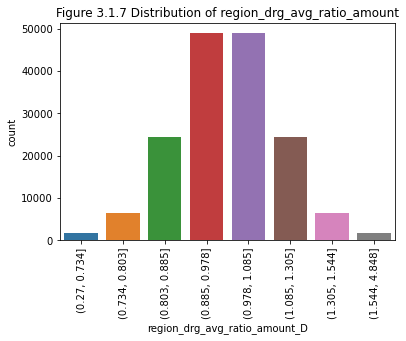

In [65]:
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x='region_drg_avg_ratio_amount_D', data=df7)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Figure 3.1.7 Distribution of region_drg_avg_ratio_amount')

##### My thought process:
- Now we have identified extreme spending compared to the same region and DRG.
- If the transactions are 2 times of the average, it should be anomalies since we can see from above description that standard deviation is high. Furthermore, the distribution plt indicates that there are a few in the far end. Therefore, above the 2 times of the average should be monitor to identified whether it is anomalies.

In [66]:
df7[df7['region_drg_avg_ratio_amount']>2].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Payments,Avg_Pmts_ByRegionDRG,region_drg_avg_ratio_amount,region_drg_avg_ratio_amount_D
1554,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,83,24865.61,22873.49,2063845.63,10082.885500,2.466120,"(1.544, 4.848]"
1886,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,330234,WESTCHESTER MEDICAL CENTER,100 WOODS RD,VALHALLA,NY,10595,NY - White Plains,24,17129.08,16369.29,411097.92,8183.321818,2.093170,"(1.544, 4.848]"
2461,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50348,UNIVERSITY OF CALIFORNIA IRVINE MED CENTER,101 CITY DRIVE SOUTH,ORANGE,CA,92868,CA - Orange County,26,33918.23,33054.88,881873.98,16319.324286,2.078409,"(1.544, 4.848]"
2800,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,140150,UNIVERSITY OF ILLINOIS HOSPITAL,1740 WEST TAYLOR ST SUITE 1400,CHICAGO,IL,60612,IL - Chicago,16,38370.00,22039.37,613920.00,17973.993333,2.134751,"(1.544, 4.848]"
2992,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,64,50882.40,48632.28,3256473.60,18517.511579,2.747799,"(1.544, 4.848]"


##### Conclusion:
- This feature identifies the anomalies by comparing a payment amount to an average amount of same the region and DGR. Here, those amounts more than 2 times the average are determined to be the anomalies, and potential frauds.

#### 3.2.8 Feature 8: The ratio to total discharges by state and DRG <a class="anchor" id="Section_328"></a>
[Back to Table of Content](#toc)
##### My thought process:
- The ratio to total discharges by region and DRG is a good feature since hospitals which share the region and DRG are more likely to similar level of total discharges. If the ratio to total discharges way above the average, we should check if it is anomolies.

In [67]:
# add the new feature average spending to the dataset 
df8 = pd.merge(data, benchmark8, how='left', on=['Hospital_referral_region_desp', 'DRG'])
# Feature 8: ratio of total discharges and avergae spending by region and total discharges
df8['region_td_avg_ratio_amount'] = np.where(df8['Tot_Dischs_ByRegionDRG']==0, 0, df8['Average_Medicare_Payment'] / df8['Tot_Dischs_ByRegionDRG'])
df8['region_td_avg_ratio_amount'] = df8['region_td_avg_ratio_amount'].fillna(-1)
df8['region_td_avg_ratio_amount'].describe()

count    163065.000000
mean        282.295107
std         339.061365
min           5.096757
25%         103.943778
50%         176.221056
75%         322.525338
max       11453.393333
Name: region_td_avg_ratio_amount, dtype: float64

##### My thought process:
- The above percentile motivates me to cut by percentile for plotting
- I set the percentile as [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1].

In [68]:
# cut by percentile for plotting
var = 'region_td_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df8[binned_var] = pd.qcut(df8[var],percentile)
df8[['region_td_avg_ratio_amount_D']]

,region_td_avg_ratio_amount_D
0,"(52.691, 92.244]"
1,"(176.221, 375.469]"
2,"(92.244, 176.221]"
3,"(92.244, 176.221]"
4,"(176.221, 375.469]"
...,...
163060,"(52.691, 92.244]"
163061,"(52.691, 92.244]"
163062,"(92.244, 176.221]"
163063,"(176.221, 375.469]"


Text(0.5, 1.0, 'Figure 3.1.8 Distribution of reg_drg_avg_ratio_amount')

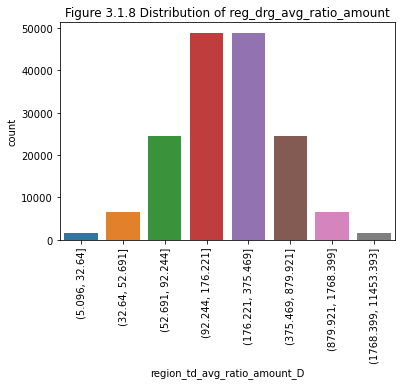

In [69]:
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x='region_td_avg_ratio_amount_D', data=df8)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Figure 3.1.8 Distribution of reg_drg_avg_ratio_amount')

##### Thought process:
- Now, we have identified extreme spending compared to the same region and DRG.
- The ratio of amount spending and average amount by name and DRG category larger than 880 times of the average can be anomalies, and potential frauds.

In [70]:
df8[df8['region_td_avg_ratio_amount']>880].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Payments,Tot_Dischs_ByRegionDRG,region_td_avg_ratio_amount,region_td_avg_ratio_amount_D
1172,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50276,CONTRA COSTA REGIONAL MEDICAL CENTER,2500 ALHAMBRA AVE,MARTINEZ,CA,94553,CA - Contra Costa County,23,19239.30,18363.08,442503.90,17.25,1064.526377,"(879.921, 1768.399]"
1191,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,16,25519.43,22553.56,408310.88,16.00,1409.597500,"(879.921, 1768.399]"
2319,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,20012,FAIRBANKS MEMORIAL HOSPITAL,1650 COWLES STREET,FAIRBANKS,AK,99701,AK - Anchorage,11,25443.00,24413.90,279873.00,22.50,1085.062222,"(879.921, 1768.399]"
2428,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,SAN FRANCISCO GENERAL HOSPITAL,1001 POTRERO AVENUE,SAN FRANCISCO,CA,94110,CA - San Francisco,19,35275.57,34455.00,670235.83,27.00,1276.111111,"(879.921, 1768.399]"
2434,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50242,DOMINICAN HOSPITAL,1555 SOQUEL DRIVE,SANTA CRUZ,CA,95065,CA - Santa Cruz,17,16705.64,15710.64,283995.88,17.00,924.155294,"(879.921, 1768.399]"


##### Conclusion:
- This feature identifies the anomalies by comparing the ratio to total discharges by the region and DRG level. Here, those amounts which are more than 880 times of the average are determined to be the anomalies, and potential frauds.

#### 3.2.9 Feature 9: The ratio to average medicare payment by region and DRG <a class="anchor" id="Section_329"></a>
[Back to Table of Content](#toc)
##### My thought process:
- The ratio to average medicare payment by region and DRG is a good feature since hospitals which share the region and DRG are more likely to similar level of medical expense. If the ratio to average mdeicare amount of hospitals way above the average, we should check if it is anomolies.

In [71]:
# add the new feature average spending to the dataset 
df9 = pd.merge(data, benchmark9, how='left', on=['Hospital_referral_region_desp', 'DRG'])
# Feature 5: ratio of amount spending and avergae medicare spending by state and DRG
df9['region_drg_avg_medi_ratio_amount'] = np.where(df9['Avg_Medi_Payment_ByRegionDRG']==0, 0, df9['Average_Medicare_Payment'] / df9['Avg_Medi_Payment_ByRegionDRG'])
df9['region_drg_avg_medi_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.175920
min           0.339831
25%           0.893506
50%           0.976954
75%           1.063344
max           4.516504
Name: region_drg_avg_medi_ratio_amount, dtype: float64

##### My thought process:
- The above percentile motivates me to cut by percentile for plotting
- I set the percentile as [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1].

In [72]:
# cut by percentile for plotting
var = 'region_drg_avg_medi_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df9[binned_var] = pd.qcut(df9[var], percentile)
df9[['region_drg_avg_medi_ratio_amount_D']]

,region_drg_avg_medi_ratio_amount_D
0,"(0.977, 1.093]"
1,"(0.977, 1.093]"
2,"(0.873, 0.977]"
3,"(0.873, 0.977]"
4,"(0.977, 1.093]"
...,...
163060,"(0.779, 0.873]"
163061,"(0.339, 0.7]"
163062,"(1.093, 1.337]"
163063,"(1.613, 4.517]"


Text(0.5, 1.0, 'Figure 3.1.9 Distribution of region_drg_avg_medi_ratio_amount')

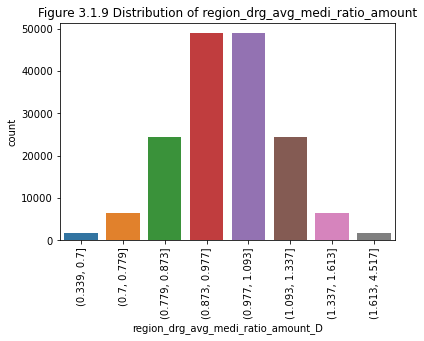

In [73]:
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x='region_drg_avg_medi_ratio_amount_D', data=df9)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Figure 3.1.9 Distribution of region_drg_avg_medi_ratio_amount')

##### My thought process:
- Now we have identified extreme spending compared to the same state and DRG.
- If the transactions are 2 times of the average, it should be anomalies since the distribution plt indicates that there are a few in the far end. Therefore, above the 2 times of the average should be monitor to identified whether it is anomalies.

In [74]:
df9[df9['region_drg_avg_medi_ratio_amount']>2].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Payments,Avg_Medi_Payment_ByRegionDRG,region_drg_avg_medi_ratio_amount,region_drg_avg_medi_ratio_amount_D
1554,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,83,24865.61,22873.49,2063845.63,9017.156000,2.536663,"(1.613, 4.517]"
1566,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,103,19700.60,18407.07,2029161.80,9017.156000,2.041339,"(1.613, 4.517]"
1886,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,330234,WESTCHESTER MEDICAL CENTER,100 WOODS RD,VALHALLA,NY,10595,NY - White Plains,24,17129.08,16369.29,411097.92,7279.557273,2.248666,"(1.613, 4.517]"
2138,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,450018,UNIVERSITY OF TEXAS MEDICAL BRANCH GAL,301 UNIVERSITY BOULEVARD,GALVESTON,TX,77555,TX - Houston,16,14123.06,13205.31,225968.96,6001.717143,2.200255,"(1.613, 4.517]"
2461,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50348,UNIVERSITY OF CALIFORNIA IRVINE MED CENTER,101 CITY DRIVE SOUTH,ORANGE,CA,92868,CA - Orange County,26,33918.23,33054.88,881873.98,15352.735714,2.153029,"(1.613, 4.517]"


##### Conclusion:
- This feature identifies the anomalies by comparing a payment amount to an average amount of same the region and DGR. Here, those amounts more than 2 times the average are determined to be the anomalies, and potential frauds.

#### 3.2.10 Feature 10: The ratio to total payment by region and DRG <a class="anchor" id="Section_3210"></a>
[Back to Table of Content](#toc)
##### My thought process:
- The ratio to total payment by region and DRG is a good feature since hospitals which share the region and DRG are more likely to similar level of medical expense. If the ratio to total amount of hospitals way above the average, we should check if it is anomolies.

In [75]:
# add the new feature average spending to the dataset 

df10 = pd.merge(data, benchmark10, how='left', on=['Hospital_referral_region_desp', 'DRG'])
# Feature 7: ratio of amount spending and avergae spending by region and DRG
df10['region_drg_pmts_ratio_amount'] = np.where(df10['Tot_Pmts_ByRegionDRG']==0, 0, df10['Total_Payments'] / df10['Tot_Pmts_ByRegionDRG'])
df10['region_drg_pmts_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.640183
min           0.014374
25%           0.564201
50%           0.869294
75%           1.250038
max          10.197440
Name: region_drg_pmts_ratio_amount, dtype: float64

##### My thought process:
- The above percentile motivates me to cut by percentile for plotting
- I set the percentile as [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1].

In [76]:
# cut by percentile for plotting
var = 'region_drg_pmts_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df10[binned_var] = pd.qcut(df10[var], percentile)
df10[['region_drg_pmts_ratio_amount_D']]

,region_drg_pmts_ratio_amount_D
0,"(0.869, 1.378]"
1,"(0.507, 0.869]"
2,"(0.507, 0.869]"
3,"(0.507, 0.869]"
4,"(0.507, 0.869]"
...,...
163060,"(0.507, 0.869]"
163061,"(0.187, 0.3]"
163062,"(0.507, 0.869]"
163063,"(0.507, 0.869]"


Text(0.5, 1.0, 'Figure 3.1.10 Distribution of region_drg_pmts_ratio_amount')

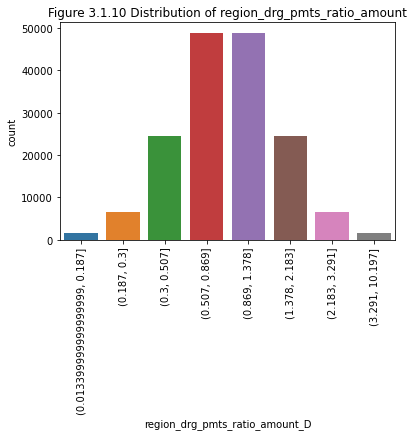

In [77]:
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x='region_drg_pmts_ratio_amount_D', data=df10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Figure 3.1.10 Distribution of region_drg_pmts_ratio_amount')

##### My thought process:
- Now we have identified extreme spending compared to the same region and DRG.
- If the transactions are 2 times of the average, it should be anomalies since it only takes 5%. Furthermore, the distribution plt indicates that there are a few in the far end. Therefore, above the 2 times of the average should be monitor to identified whether it is anomalies.

In [78]:
df10[df10['region_drg_pmts_ratio_amount']>2].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Payments,Tot_Pmts_ByRegionDRG,region_drg_pmts_ratio_amount,region_drg_pmts_ratio_amount_D
21,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10113,MOBILE INFIRMARY,5 MOBILE INFIRMARY CIRCLE,MOBILE,AL,36652,AL - Mobile,66,5550.90,4219.90,366359.40,166715.664000,2.197510,"(2.183, 3.291]"
33,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,30030,PHOENIX BAPTIST HOSPITAL,2000 WEST BETHANY HOME ROAD,PHOENIX,AZ,85015,AZ - Phoenix,42,7673.21,6541.92,322274.82,156931.058667,2.053608,"(1.378, 2.183]"
60,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40114,BAPTIST HEALTH MEDICAL CENTER-LITTLE ROCK,"9601 INTERSTATE 630, EXIT 7",LITTLE ROCK,AR,72205,AR - Little Rock,139,5968.44,4592.46,829613.16,273109.015556,3.037663,"(2.183, 3.291]"
80,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50108,SUTTER GENERAL HOSPITAL,2801 L STREET,SACRAMENTO,CA,95816,CA - Sacramento,67,8894.85,7905.65,595954.95,292199.565000,2.039548,"(1.378, 2.183]"
125,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50625,CEDARS-SINAI MEDICAL CENTER,8700 BEVERLY BLVD,LOS ANGELES,CA,90048,CA - Los Angeles,40,9754.92,7705.97,390196.80,179916.134615,2.168770,"(1.378, 2.183]"


##### Conclusion:
- This feature identifies the anomalies by comparing a payment amount to an average amount of same the region and DGR. Here, those amounts more than 2 times the average are determined to be the anomalies, and potential frauds.

## Section 4: Unsupervised Machine Learning Techniques II (Autoencoder)<a class="anchor" id="Section_4"></a>
[Back to Table of Content](#toc)
#### What is PyOD?
- My thoughts: During this assignment, I am going to do the anomaly detection by Python Outlier Detection (PyOD) which is an open-source Python toolbox for performing scalable outlier detection on multivariate data. It collects a wide range of algorithms ranging from supervised learning to unsupervised learning techniques. There are numerous techniques that are quite popular in anomaly detection of PyOD, including PCA, kNN, AutoEncoder, SOS, and XGB. Multiple autoencoder models and methods are leveraged in this assginment.

In [215]:
df1_key = df1.state_drg_avg_ratio_amount
df2_key = df2.provider_city_disc_ratio
df3_key = df3.st_td_avg_ratio_amount
df4_key = df4.provider_city_drg_medi_ratio
df5_key = df5.state_drg_avg_medi_ratio_amount
df6_key = df6.provider_city_ratio
df7_key = df7.region_drg_avg_ratio_amount
df8_key = df8.region_td_avg_ratio_amount
df9_key = df9.region_drg_avg_medi_ratio_amount
df10_key = df10.region_drg_pmts_ratio_amount
df = pd.concat([df1_key, df2_key, df3_key, df4_key, df5_key, df6_key, df7_key, df8_key, df9_key, df10_key],axis=1)
df.head()
df.shape

(163065, 10)

In [216]:
# create a df with renamed columns
dd = pd.DataFrame(df)
# dd.columns = ['state_drg_avg_ratio_amount', 'state_drg_med_ratio_amount', 'st_td_avg_ratio_amount', 'st_td_med_ratio_amount',
#              'state_drg_avg_medi_ratio_amount', 'state_drg_med_medi_ratio_amount', 'region_drg_avg_ratio_amount',
#              'region_td_avg_ratio_amount', 'region_drg_avg_medi_ratio_amount', 'region_drg_pmts_ratio_amount']
dd.head()

,state_drg_avg_ratio_amount,provider_city_disc_ratio,st_td_avg_ratio_amount,provider_city_drg_medi_ratio,state_drg_avg_medi_ratio_amount,provider_city_ratio,region_drg_avg_ratio_amount,region_td_avg_ratio_amount,region_drg_avg_medi_ratio_amount,region_drg_pmts_ratio_amount
0,1.005855,1.793362,124.648225,1.038763,1.035685,0.694634,1.037810,70.054853,1.038763,1.371297
1,1.007653,0.483439,130.221081,1.000000,1.081989,0.849598,1.008540,181.224734,1.080948,0.508808
2,0.946260,0.477661,116.538305,0.889465,0.968301,0.611923,0.947092,162.182829,0.967369,0.819100
3,0.943232,0.550053,108.044005,0.899200,0.897723,0.593905,0.944062,150.361569,0.896859,0.850499
4,0.985152,0.571655,126.943254,1.000000,1.054754,0.726413,0.986018,176.663081,1.053739,0.639574


In [217]:
# check NA
dd.isnull().sum()

state_drg_avg_ratio_amount          0
provider_city_disc_ratio            0
st_td_avg_ratio_amount              0
provider_city_drg_medi_ratio        0
state_drg_avg_medi_ratio_amount     0
provider_city_ratio                 0
region_drg_avg_ratio_amount         0
region_td_avg_ratio_amount          0
region_drg_avg_medi_ratio_amount    0
region_drg_pmts_ratio_amount        0
dtype: int64

In [218]:
# !pip3 install pyod
# !pip install --upgrade pyod
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [219]:
# cut data for ease of computation intensity
X = dd.sample(frac=.2, replace=False, random_state=23)
X.shape

(32613, 10)

In [220]:
# split data into train and test
X_train, X_test = train_test_split(X, train_size=0.8, random_state=23)
X_train.head()

,state_drg_avg_ratio_amount,provider_city_disc_ratio,st_td_avg_ratio_amount,provider_city_drg_medi_ratio,state_drg_avg_medi_ratio_amount,provider_city_ratio,region_drg_avg_ratio_amount,region_td_avg_ratio_amount,region_drg_avg_medi_ratio_amount,region_drg_pmts_ratio_amount
159234,1.054991,0.528834,437.043872,0.938056,1.079933,1.063117,1.041725,311.169250,1.030274,1.033062
150291,1.018665,0.564759,1936.072857,1.000000,0.842655,4.813782,1.018665,1936.072857,0.842655,0.682862
9026,1.232722,0.846656,105.771057,1.188784,1.265674,0.575904,1.234366,99.816716,1.289895,1.424701
76329,0.940920,0.866988,94.318809,1.000000,0.880921,0.615660,0.928128,68.661455,0.894147,0.540250
84392,0.965711,0.663994,58.014388,1.000000,0.853674,0.486900,1.000000,126.000000,1.000000,1.000000


In [221]:
# In the interest of preventing information about the distribution of the test set 
# leaking into your model, I standardize dataset after splitting
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Only the training data are used to fit the scaler transformation
X_test_scaled = scaler.transform(X_test) # then the scaler is used to transform the test input data.
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

- My thoughts: Before I implement PyOD, I need to extract the good features from the credit card dataset after EDA. The credit card dataset does not has the target variable Y since the unsupervised Autoencoder models only use the X variables. In order to give you a good sense of what the data look like, I use PCA reduce to two dimensions and plot accordingly.

In order to give you a good sense of what the data look like, I use PCA reduce to two dimensions and plot accordingly.

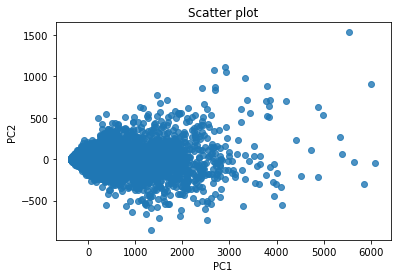

In [222]:
import numpy as np
import pandas as pd
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter(action='ignore', category='RequestsDependencyWarning')
pca = PCA(2)
x_pca = pca.fit_transform(X_train)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']
x_pca.head()

# Plot
import matplotlib.pyplot as plt
# plt.scatter(X_train['state_drg_avg_ratio_amount'], X_train['region_drg_pmts_ratio_amount'], alpha=0.8) 
plt.scatter(x_pca['PC1'], x_pca['PC2'], alpha=0.8) 
plt.title('Scatter plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### 4.1 Autoencoders <a class="anchor" id="Section_41"></a>
[Back to Table of Content](#toc)
#### What is PCA?
- My thoughts: Principal Component Analysis (PCA) is the common technique of dimension reduction of a dataset consisting of a large number of related variables while retaining as much variance in the data as possible. At the same time, dimensionality reduction can also find outliers. The process is following. PCA transform features into less variables but remains the key important factors. After the transformation, the “normal” data points will align along the eigenvectors (new axes) with small eigenvalues. The outliers are far away from the eigenvectors with large eigenvalues. Therefore the distances between each data point to the eigenvectors become a measure for the outlier. A large distance indicates an anomaly. 
#### What is Autoencoders?
- My thoughts: An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data (unsupervised learning). The encoding is validated and refined by attempting to regenerate the input from the encoding. In other words, autoencoders are used to help reduce the noise in data. Also, Autoencoder techniques can perform non-linear transformations with their non-linear activation function and multiple layers. It is more efficient to train several layers with an autoencoder, rather than training one huge transformation with PCA. The autoencoder techniques thus show their merits when the data problems are complex and non-linear in nature.

#### 4.1.1 Model 1: [25, 2, 2, 25]. The input layer and the output layer has 25 neurons each. There are two hidden layers, each has two neurons. <a class="anchor" id="Section_411"></a>
##### 4.1.1.1 Build my model <a class="anchor" id="Section_4111"></a>
[Back to Table of Content](#toc)

In [515]:
clf1 = AutoEncoder(hidden_neurons =[10, 2, 2, 10])
%time clf1.fit(X_train_scaled)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 10)                110       
                                                                 
 dropout_48 (Dropout)        (None, 10)                0         
                                                                 
 dense_55 (Dense)            (None, 10)                110       
                                                                 
 dropout_49 (Dropout)        (None, 10)                0         
                                                                 
 dense_56 (Dense)            (None, 10)                110       
                                                                 
 dropout_50 (Dropout)        (None, 10)                0         
                                                                 
 dense_57 (Dense)            (None, 2)                

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[10, 2, 2, 10],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x00000217A59CB1F0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [518]:
X_test_scaled.drop(['score', 'cluster'], axis=1, inplace=True)

In [519]:
y_train_scores = clf1.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf1.predict(X_test_scaled)  # outlier labels (0 or 1)
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf1.decision_function(X_test_scaled)  # outlier scores

y_test_pred = pd.Series(y_test_pred)
y_test_scores = pd.Series(y_test_scores)
y_test_pred.value_counts()

204/204 [==============================] - 0s 696us/step


0    5857
1     666
dtype: int64

- My thoughts: The function decision_functions() generates the anomaly score based on your model predictions. The Autoencoder model uses the Euclidean distance to measure the distance. Since an outlier is the point that is distant from eigenvectors with large eigenvalue, the outlier score is defined as the distance to its eigenvectors. Each point will have an outlier score. Our job is to find those points with high outlier scores.

#### 4.1.1.2 Determine a reasonable boundary <a class="anchor" id="Section_4112"></a>
[Back to Table of Content](#toc)

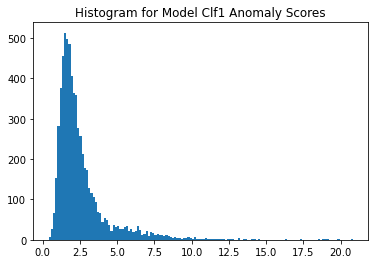

In [520]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

,0
count,6523.000000
mean,2.577973
std,1.839881
min,0.401155
25%,1.517435
50%,2.027116
75%,2.901018
max,20.826297


Text(0.5, 1.0, 'df_y_test_scores Distribution of binned_var')

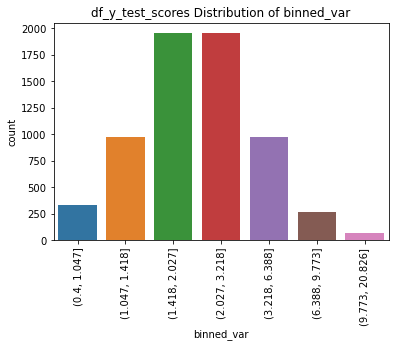

In [521]:
# convert y_test_scores (outlier score) into df
display(pd.DataFrame(y_test_scores).describe())
# check the distritbution of y_test_scores (outlier score)
df_y_test_scores = pd.DataFrame(y_test_scores)
df_y_test_scores.rename(columns={0: 'bins'}, inplace=True)
percentile = [0,0.05,0.2,0.5,0.8,0.95,0.99,1]
df_y_test_scores['binned_var'] = pd.qcut(df_y_test_scores['bins'], percentile, duplicates='drop')
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="binned_var", data=df_y_test_scores)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('df_y_test_scores Distribution of binned_var')

- My thoughts: From the describe of the outlier score dataframe, 2.89 is in the 75% of the dataset. On the other hand, the mean is higher than medium, which indicates that there are a few extreme high values. (The max value validates the assumption) From the distribution of the outlier score, 95% of the dataset is under 24787.87. A data point with a high anomaly score is abnormal. We can use a histogram to find those points. In histogram plot, we have 'auto' as X-axis bins. The histogram shows the count by the anomaly score. Most of the data points have low anomaly scores. If we choose 6.2 to be the cut point, we can suggest those >= 6.2 to be outliers. (We use the anomaly scores of the training data to determine the boundary.)

#### 4.1.1.3 Present the summary statistics of the normal and abnormal clusters <a class="anchor" id="Section_4113"></a>
[Back to Table of Content](#toc)

In [522]:
# Let's see how many '0's and '1's. We get 6166 '0's and 357 '1's.
df_test = pd.DataFrame(X_test_scaled)
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<6.2, 0, 1)
df_test['cluster'].value_counts() 
# Now let's show the summary statistics:
# df_test.groupby('y_by_average_cluster').mean()
df_test.columns = ['state_drg_avg_ratio_amount', 'state_drg_med_ratio_amount', 'st_td_avg_ratio_amount', 'st_td_med_ratio_amount',
             'state_drg_avg_medi_ratio_amount', 'state_drg_med_medi_ratio_amount', 'region_drg_avg_ratio_amount',
             'region_td_avg_ratio_amount', 'region_drg_avg_medi_ratio_amount', 'region_drg_pmts_ratio_amount', 'score', 'cluster']
display(df_test.groupby('cluster').mean())
df_test.cluster.value_counts()
print('normals vs anmoalies:\n' + str(df_test.cluster.value_counts()))
print('anomaly pct:', str(round(df_test.cluster.value_counts()[1]/(df_test.cluster.value_counts()[0]+df_test.cluster.value_counts()[1])*100, 2))+'%')

,state_drg_avg_ratio_amount,state_drg_med_ratio_amount,st_td_avg_ratio_amount,st_td_med_ratio_amount,state_drg_avg_medi_ratio_amount,state_drg_med_medi_ratio_amount,region_drg_avg_ratio_amount,region_td_avg_ratio_amount,region_drg_avg_medi_ratio_amount,region_drg_pmts_ratio_amount,score
cluster,,,,,,,,,,,
0,-0.110713,-0.024427,-0.116395,-0.081796,-0.105735,-0.106130,-0.118251,-0.119300,-0.112547,-0.045627,2.241536
1,1.707303,0.582861,2.292244,1.443833,1.693956,1.982221,1.676563,2.251048,1.680016,0.838059,8.388831


normals vs anmoalies:
0    6166
1     357
Name: cluster, dtype: int64
anomaly pct: 5.47%


In [523]:
from pyod.utils.utility import standardizer
import warnings
warnings.simplefilter(action='ignore')
# standardizer(X_train, X_test)
# X_test.drop(['score', 'cluster'], axis=1, inplace=True)
X_test.shape

(6523, 14)

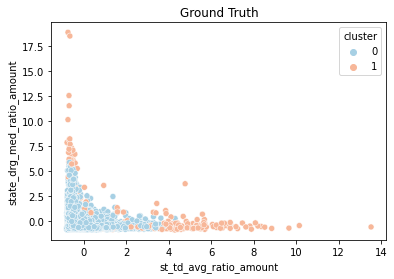

In [524]:
# take st_td_avg_ratio_amount and state_drg_med_ratio_amount in score as an example
sns.scatterplot(x='st_td_avg_ratio_amount', y='state_drg_med_ratio_amount', hue='cluster', data=df_test, palette='RdBu_r');
plt.title('Ground Truth');

- My thoughts: I use st_td_avg_ratio_amount (x) and state_drg_med_ratio_amount (y) classified by cluster in df_test to plot the scatter graph. From the scatter graph above, orange dots are anmalies while blue dots are normal obsercations. Those are far away from eigenvectors with large eigenvalues are identified as anomalies. 

#### 4.1.2 Model 2: [10, 5, 2, 2, 5, 10]. The input layer and the output layer has 25 neurons each. There are two hidden layers, each has two neurons. <a class="anchor" id="Section_412"></a>
##### 4.1.2.1 Build my model <a class="anchor" id="Section_4121"></a>
[Back to Table of Content](#toc)

In [525]:
clf2 = AutoEncoder(hidden_neurons =[10, 5, 2, 2, 5, 10])
%time clf2.fit(X_train_scaled)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 10)                110       
                                                                 
 dropout_54 (Dropout)        (None, 10)                0         
                                                                 
 dense_62 (Dense)            (None, 10)                110       
                                                                 
 dropout_55 (Dropout)        (None, 10)                0         
                                                                 
 dense_63 (Dense)            (None, 10)                110       
                                                                 
 dropout_56 (Dropout)        (None, 10)                0         
                                                                 
 dense_64 (Dense)            (None, 5)                

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[10, 5, 2, 2, 5, 10],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x00000217A59CB1F0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [530]:
# X_test_scaled#.drop(['score', 'cluster'], axis=1, inplace=True)

In [531]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_train_scores = clf2.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf2.predict(X_test_scaled)  # outlier labels (0 or 1)
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf2.decision_function(X_test_scaled)  # outlier scores

y_test_pred = pd.Series(y_test_pred)
y_test_scores = pd.Series(y_test_scores)
y_test_pred.value_counts()

204/204 [==============================] - 0s 736us/step


0    5857
1     666
dtype: int64

- My thoughts: The function decision_functions() generates the anomaly score based on your model predictions. The Autoencoder model uses the Euclidean distance to measure the distance. Since an outlier is the point that is distant from eigenvectors with large eigenvalue, the outlier score is defined as the distance to its eigenvectors. Each point will have an outlier score. Our job is to find those points with high outlier scores.

#### 4.1.2.2 Determine a reasonable boundary <a class="anchor" id="Section_4122"></a>
[Back to Table of Content](#toc)

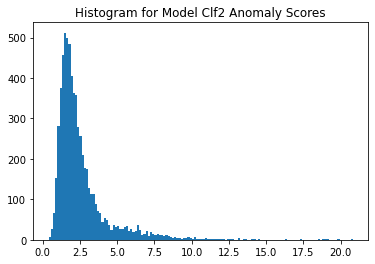

In [532]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf2 Anomaly Scores")
plt.show()

,0
count,6523.000000
mean,2.577705
std,1.840217
min,0.400732
25%,1.517562
50%,2.027516
75%,2.900675
max,20.826206


Text(0.5, 1.0, 'df_y_test_scores Distribution of binned_var')

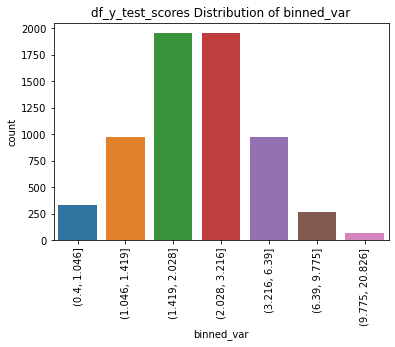

In [533]:
# convert y_test_scores (outlier score) into df
display(pd.DataFrame(y_test_scores).describe())
# check the distritbution of y_test_scores (outlier score)
df_y_test_scores = pd.DataFrame(y_test_scores)
df_y_test_scores.rename(columns={0: 'bins'}, inplace=True)
percentile = [0,0.05,0.2,0.5,0.8,0.95,0.99,1]
df_y_test_scores['binned_var'] = pd.qcut(df_y_test_scores['bins'], percentile, duplicates='drop')
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="binned_var", data=df_y_test_scores)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('df_y_test_scores Distribution of binned_var')

- My thoughts: From the describe of the outlier score dataframe, 2.89 is in the 75% of the dataset. On the other hand, the mean is higher than medium, which indicates that there are a few extreme high values. (The max value validates the assumption) From the distribution of the outlier score, 95% of the dataset is under 24787.87. A data point with a high anomaly score is abnormal. We can use a histogram to find those points. In histogram plot, we have 'auto' as X-axis bins. The histogram shows the count by the anomaly score. Most of the data points have low anomaly scores. If we choose 6.1 to be the cut point, we can suggest those >= 6.1 to be outliers. (We use the anomaly scores of the training data to determine the boundary.)

#### 4.1.2.3 Present the summary statistics of the normal and abnormal clusters <a class="anchor" id="Section_4123"></a>
[Back to Table of Content](#toc)

In [534]:
# Let's see how many '0's and '1's. We get 6174 '0's and 349 '1's.
df_test = pd.DataFrame(X_test_scaled)
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<6.1, 0, 1)
df_test['cluster'].value_counts() 
# Now let's show the summary statistics:
# df_test.groupby('y_by_average_cluster').mean()
df_test.columns = ['state_drg_avg_ratio_amount', 'state_drg_med_ratio_amount', 'st_td_avg_ratio_amount', 'st_td_med_ratio_amount',
             'state_drg_avg_medi_ratio_amount', 'state_drg_med_medi_ratio_amount', 'region_drg_avg_ratio_amount',
             'region_td_avg_ratio_amount', 'region_drg_avg_medi_ratio_amount', 'region_drg_pmts_ratio_amount', 'score', 'cluster']
display(df_test.groupby('cluster').mean())
df_test.cluster.value_counts()
print('normals vs anmoalies:\n' + str(df_test.cluster.value_counts()))
print('anomaly pct:', str(round(df_test.cluster.value_counts()[1]/(df_test.cluster.value_counts()[0]+df_test.cluster.value_counts()[1])*100, 2))+'%')

,state_drg_avg_ratio_amount,state_drg_med_ratio_amount,st_td_avg_ratio_amount,st_td_med_ratio_amount,state_drg_avg_medi_ratio_amount,state_drg_med_medi_ratio_amount,region_drg_avg_ratio_amount,region_td_avg_ratio_amount,region_drg_avg_medi_ratio_amount,region_drg_pmts_ratio_amount,score
cluster,,,,,,,,,,,
0,-0.113954,-0.026579,-0.118827,-0.086315,-0.109542,-0.109123,-0.122248,-0.121859,-0.117269,-0.048375,2.231038
1,1.682751,0.592289,2.229017,1.452889,1.679530,1.941978,1.665480,2.191560,1.680980,0.845451,8.293525


normals vs anmoalies:
0    6150
1     373
Name: cluster, dtype: int64
anomaly pct: 5.72%


In [535]:
from pyod.utils.utility import standardizer
import warnings
warnings.simplefilter(action='ignore')
# standardizer(X_train, X_test)
# X_test.drop(['score', 'cluster'], axis=1, inplace=True)
X_test.shape

(6523, 14)

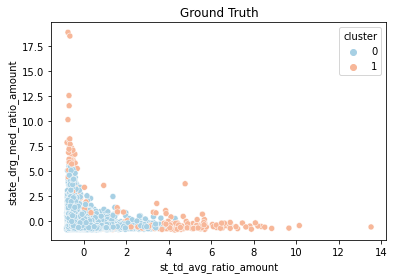

In [536]:
# take st_td_avg_ratio_amount and state_drg_med_ratio_amount in score as an example
sns.scatterplot(x='st_td_avg_ratio_amount', y='state_drg_med_ratio_amount', hue='cluster', data=df_test, palette='RdBu_r');
plt.title('Ground Truth');

- My thoughts: I use st_td_avg_ratio_amount (x) and state_drg_med_ratio_amount (y) classified by cluster in df_test to plot the scatter graph. From the scatter graph above, orange dots are anmalies while blue dots are normal obsercations. Those are far away from eigenvectors with large eigenvalues are identified as anomalies. 

#### 4.1.3 Model 2: [10, 8, 5, 2, 2, 5, 8, 10]. The input layer and the output layer has 10 neurons each. There are two hidden layers, each has two neurons. <a class="anchor" id="Section_413"></a>
##### 4.1.3.1 Build my model <a class="anchor" id="Section_4131"></a>
[Back to Table of Content](#toc)

In [537]:
clf3 = AutoEncoder(hidden_neurons =[10, 8, 5, 2, 2, 5, 8, 10])
%time clf3.fit(X_train_scaled)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 10)                110       
                                                                 
 dropout_62 (Dropout)        (None, 10)                0         
                                                                 
 dense_71 (Dense)            (None, 10)                110       
                                                                 
 dropout_63 (Dropout)        (None, 10)                0         
                                                                 
 dense_72 (Dense)            (None, 10)                110       
                                                                 
 dropout_64 (Dropout)        (None, 10)                0         
                                                                 
 dense_73 (Dense)            (None, 8)                

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[10, 8, 5, 2, 2, 5, 8, 10],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x00000217A59CB1F0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [538]:
X_test_scaled.drop(['score', 'cluster'], axis=1, inplace=True)

In [539]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_train_scores = clf3.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf3.predict(X_test_scaled)  # outlier labels (0 or 1)
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf3.decision_function(X_test_scaled)  # outlier scores

y_test_pred = pd.Series(y_test_pred)
y_test_scores = pd.Series(y_test_scores)
y_test_pred.value_counts()

204/204 [==============================] - 0s 1ms/step


0    5857
1     666
dtype: int64

- My thoughts: The function decision_functions() generates the anomaly score based on your model predictions. The Autoencoder model uses the Euclidean distance to measure the distance. Since an outlier is the point that is distant from eigenvectors with large eigenvalue, the outlier score is defined as the distance to its eigenvectors. Each point will have an outlier score. Our job is to find those points with high outlier scores.

#### 4.1.3.2 Determine a reasonable boundary <a class="anchor" id="Section_4132"></a>
[Back to Table of Content](#toc)

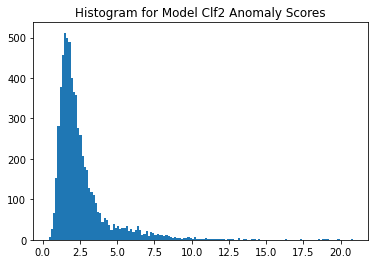

In [540]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf2 Anomaly Scores")
plt.show()

,0
count,6523.000000
mean,2.577925
std,1.839926
min,0.401842
25%,1.517153
50%,2.027526
75%,2.900875
max,20.826370


Text(0.5, 1.0, 'df_y_test_scores Distribution of binned_var')

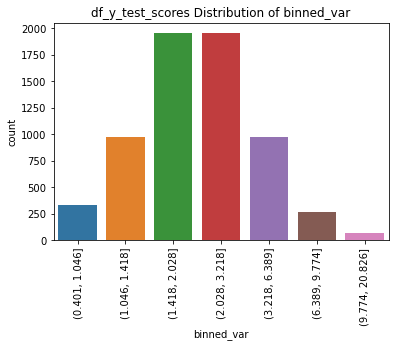

In [541]:
# convert y_test_scores (outlier score) into df
display(pd.DataFrame(y_test_scores).describe())
# check the distritbution of y_test_scores (outlier score)
df_y_test_scores = pd.DataFrame(y_test_scores)
df_y_test_scores.rename(columns={0: 'bins'}, inplace=True)
percentile = [0,0.05,0.2,0.5,0.8,0.95,0.99,1]
df_y_test_scores['binned_var'] = pd.qcut(df_y_test_scores['bins'], percentile, duplicates='drop')
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="binned_var", data=df_y_test_scores)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('df_y_test_scores Distribution of binned_var')

- My thoughts: From the describe of the outlier score dataframe, 2.89 is in the 75% of the dataset. On the other hand, the mean is higher than medium, which indicates that there are a few extreme high values. (The max value validates the assumption) From the distribution of the outlier score, 95% of the dataset is under 24787.87. A data point with a high anomaly score is abnormal. We can use a histogram to find those points. In histogram plot, we have 'auto' as X-axis bins. The histogram shows the count by the anomaly score. Most of the data points have low anomaly scores. If we choose 6.1 to be the cut point, we can suggest those >= 6.1 to be outliers. (We use the anomaly scores of the training data to determine the boundary.)

#### 4.1.3.3 Present the summary statistics of the normal and abnormal clusters <a class="anchor" id="Section_4133"></a>
[Back to Table of Content](#toc)

In [542]:
# Let's see how many '0's and '1's. We get 6175 '0's and 348 '1's.
df_test = pd.DataFrame(X_test_scaled)
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<6.1, 0, 1)
df_test['cluster'].value_counts() 
# Now let's show the summary statistics:
# df_test.groupby('y_by_average_cluster').mean()
df_test.columns = ['state_drg_avg_ratio_amount', 'state_drg_med_ratio_amount', 'st_td_avg_ratio_amount', 'st_td_med_ratio_amount',
             'state_drg_avg_medi_ratio_amount', 'state_drg_med_medi_ratio_amount', 'region_drg_avg_ratio_amount',
             'region_td_avg_ratio_amount', 'region_drg_avg_medi_ratio_amount', 'region_drg_pmts_ratio_amount', 'score', 'cluster']
display(df_test.groupby('cluster').mean())
print('normals vs anmoalies:\n' + str(df_test.cluster.value_counts()))
print('anomaly pct:', str(round(df_test.cluster.value_counts()[1]/(df_test.cluster.value_counts()[0]+df_test.cluster.value_counts()[1])*100, 2))+'%')

,state_drg_avg_ratio_amount,state_drg_med_ratio_amount,st_td_avg_ratio_amount,st_td_med_ratio_amount,state_drg_avg_medi_ratio_amount,state_drg_med_medi_ratio_amount,region_drg_avg_ratio_amount,region_td_avg_ratio_amount,region_drg_avg_medi_ratio_amount,region_drg_pmts_ratio_amount,score
cluster,,,,,,,,,,,
0,-0.113689,-0.026670,-0.118800,-0.085650,-0.109077,-0.109120,-0.121923,-0.121856,-0.116807,-0.048378,2.231938
1,1.683195,0.595459,2.234892,1.446031,1.676652,1.947449,1.664907,2.197725,1.678168,0.847912,8.298804


normals vs anmoalies:
0    6151
1     372
Name: cluster, dtype: int64
anomaly pct: 5.7%


In [543]:
from pyod.utils.utility import standardizer
import warnings
warnings.simplefilter(action='ignore')
# standardizer(X_train, X_test)
# X_test.drop(['score', 'cluster'], axis=1, inplace=True)
X_test.shape

(6523, 14)

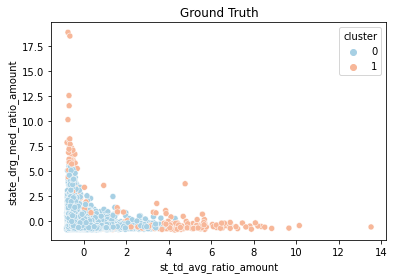

In [544]:
# take st_td_avg_ratio_amount and state_drg_med_ratio_amount in score as an example
sns.scatterplot(x='st_td_avg_ratio_amount', y='state_drg_med_ratio_amount', hue='cluster', data=df_test, palette='RdBu_r');
plt.title('Ground Truth');

- My thoughts: I use st_td_avg_ratio_amount (x) and state_drg_med_ratio_amount (y) classified by cluster in df_test to plot the scatter graph. From the scatter graph above, orange dots are anmalies while blue dots are normal obsercations. Those are far away from eigenvectors with large eigenvalues are identified as anomalies. 

## Aggregating multiple models for better accuracy

In [550]:
X_test.drop(['y_by_average_score', 'y_by_average_cluster', 'y_by_maximization_score', 'y_by_maximization_cluster'], axis=1, inplace=True)

In [551]:
from datetime import datetime
from pyod.models.combination import aom, moa, average, maximization
start=datetime.now()
# Put all the predictions in a data frame
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

test_scores  = pd.DataFrame({'clf1': clf1.decision_function(X_test),
                             'clf2': clf2.decision_function(X_test),
                             'clf3': clf3.decision_function(X_test) 
                            })
print(datetime.now()-start)
%time train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

204/204 [==============================] - 0s 881us/step
0:00:00.737609
Wall time: 4.01 ms


### Method 1: Average

In [552]:
# Combination by average
y_by_average = average(test_scores_norm)
y_by_average[1:10]

array([-0.10348209, -0.45140583, -0.43748427,  1.30606578, -0.57402577,
       -0.9817059 , -0.59012712, -0.67338087,  0.05074526])

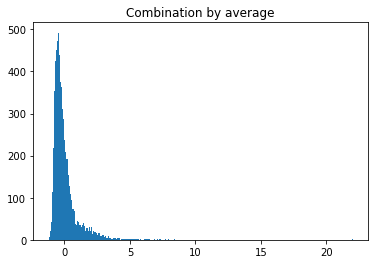

In [553]:
# Combination by average
y_by_average = average(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

Text(0.5, 1.0, 'df_y_by_average Distribution of binned_var')

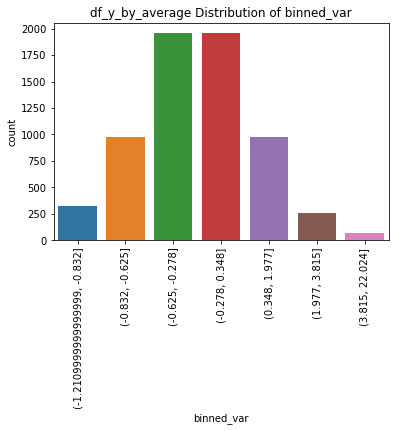

In [554]:
# check the distritbution of y_test_scores
df_y_by_average = pd.DataFrame(y_by_average)
df_y_by_average.rename(columns={0: 'bins'}, inplace=True)
percentile = [0,0.05,0.2,0.5,0.8,0.95,0.99,1]
df_y_by_average['binned_var'] = pd.qcut(df_y_by_average['bins'], percentile, duplicates='drop')
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="binned_var", data=df_y_by_average)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('df_y_by_average Distribution of binned_var')

In [555]:
df_test = pd.DataFrame(X_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<4, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    6464
1      59
Name: y_by_average_cluster, dtype: int64

In [556]:
df_test.groupby('y_by_average_cluster').mean()

,0,1,2,3,4,5,6,7,8,9,y_by_average_score
y_by_average_cluster,,,,,,,,,,,
0,-0.030965,-0.011972,-0.028369,-0.018428,-0.027523,-0.023116,-0.030552,-0.029872,-0.027562,-0.011309,-0.048131
1,3.392499,1.311645,3.108106,2.018946,3.015418,2.532624,3.347307,3.272776,3.019707,1.239026,5.604322


### Method 2: The Maximum of Maximum (MOM)

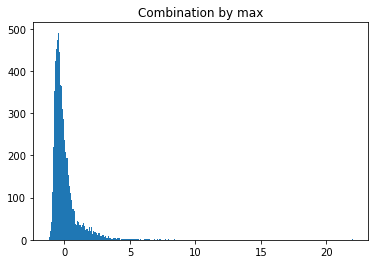

In [557]:
# Combination by max
y_by_maximization = maximization(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.show()

Text(0.5, 1.0, 'df_y_by_maximization Distribution of binned_var')

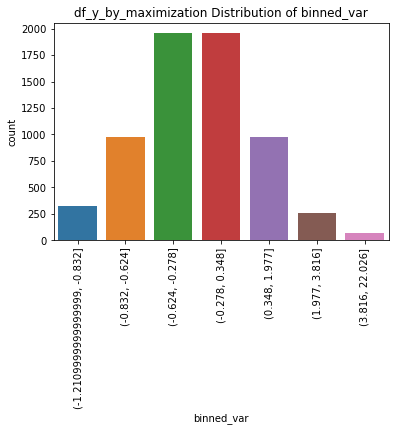

In [558]:
# check the distritbution of y_test_scores
df_y_by_maximization = pd.DataFrame(y_by_maximization)
df_y_by_maximization.rename(columns={0: 'bins'}, inplace=True)
percentile = [0,0.05,0.2,0.5,0.8,0.95,0.99,1]
df_y_by_maximization['binned_var'] = pd.qcut(df_y_by_maximization['bins'], percentile, duplicates='drop')
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="binned_var", data=df_y_by_maximization)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('df_y_by_maximization Distribution of binned_var')

In [559]:
df_test = pd.DataFrame(X_test)
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<4, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()

0    6464
1      59
Name: y_by_maximization_cluster, dtype: int64

In [560]:
df_test.groupby('y_by_maximization_cluster').mean()

,0,1,2,3,4,5,6,7,8,9,y_by_average_score,y_by_average_cluster,y_by_maximization_score
y_by_maximization_cluster,,,,,,,,,,,,,
0,-0.030965,-0.011972,-0.028369,-0.018428,-0.027523,-0.023116,-0.030552,-0.029872,-0.027562,-0.011309,-0.048131,0.0,-0.047777
1,3.392499,1.311645,3.108106,2.018946,3.015418,2.532624,3.347307,3.272776,3.019707,1.239026,5.604322,1.0,5.604605


### 4.2 Isolation Forest<a class="anchor" id="Section_42"></a>
[Back to Table of Content](#toc)
#### What is Isolation Forest?
- My thoughts: Isolation forest is an anomaly detection algorithm created by Fei Tony Liu et al. It detects anomalies using isolation rather than modelling the normal points. In an Isolation Forest, randomly sub-sampled data is processed in a tree structure based on randomly selected features. The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them.

#### Similarities and Differences between Isolation Forest and Random Forest
- Both random forest and isolation forest are built in a bunch of decision trees. However, random forest is used for supervised learning while isolation forest is used for anomaly detection in unsupervised learning.

In [561]:
df1_key = df1.state_drg_avg_ratio_amount
df2_key = df2.provider_city_disc_ratio
df3_key = df3.st_td_avg_ratio_amount
df4_key = df4.provider_city_drg_medi_ratio
df5_key = df5.state_drg_avg_medi_ratio_amount
df6_key = df6.provider_city_ratio
df7_key = df7.region_drg_avg_ratio_amount
df8_key = df8.region_td_avg_ratio_amount
df9_key = df9.region_drg_avg_medi_ratio_amount
df10_key = df10.region_drg_pmts_ratio_amount
dd = pd.concat([df1_key,df2_key,df3_key,df4_key,df5_key,df6_key,df7_key,df8_key,df9_key,df10_key],axis=1)
# dd.columns = ['state_drg_avg_ratio_amount', 'state_drg_med_ratio_amount', 'st_td_avg_ratio_amount', 'st_td_med_ratio_amount',
#              'state_drg_avg_medi_ratio_amount', 'state_drg_med_medi_ratio_amount', 'region_drg_avg_ratio_amount',
#              'region_td_avg_ratio_amount', 'region_drg_avg_medi_ratio_amount', 'region_drg_pmts_ratio_amount']
dd.shape

(163065, 10)

In [562]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# PyOD
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data
#from pyod.utils.data import evaluate_print
#from pyod.utils.example import visualize

In [563]:
# train test split
from sklearn.model_selection import train_test_split
x = dd.sample(frac=0.2, replace=False, random_state=12)
X_train, X_test = train_test_split(x, train_size=0.8, random_state=12)

In [564]:
# standardize the predictors
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)

In [565]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X_train)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']
x_pca.head()

,PC1,PC2
0,-0.536106,-0.478273
1,-0.776007,-0.497386
2,-0.906064,-0.318313
3,-2.054688,-0.517655
4,-2.590806,-0.033963


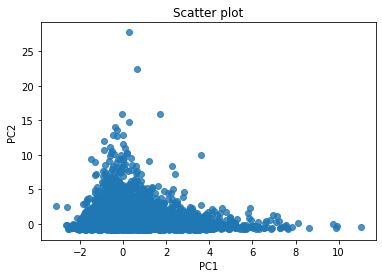

In [566]:
# Plot
import matplotlib.pyplot as plt
plt.scatter(X_train[0], X_train[1], alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [567]:
import numpy as np
import pandas as pd
from pyod.models.iforest import IForest

#### 4.2.1 Model 1: max_samples = 100 <a class="anchor" id="Section_421"></a>
##### 4.2.1.1 Build my model <a class="anchor" id="Section_4211"></a>
[Back to Table of Content](#toc)
- My thoughts: Before I implement PyOD, I need to extract the good features from the credit card dataset after EDA. The credit card dataset does not has the target variable Y since the unsupervised KNN models only use the X variables.

In [568]:
# !pip3 install pyod
# !pip install --upgrade pyod
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [569]:
from pyod.models.iforest import IForest
clf1 = IForest(behaviour="new", max_samples=100) 
clf1.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=100, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [570]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
# We apply the model to the test data X_test to get the outlier scores.
y_test_scores = clf1.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

0   -0.083976
1   -0.094074
2   -0.103272
3   -0.160693
4    0.005442
dtype: float64

- My thoughts: The function decision_functions() generates the anomaly score based on your model predictions. The PCA model uses the Euclidean distance to measure the distance. Since an outlier is the point that is distant from eigenvectors with large eigenvalue, the outlier score is defined as the distance to its eigenvectors. Each point will have an outlier score. Our job is to find those points with high outlier scores.

##### 4.2.2.2 Determine a reasonable boundary <a class="anchor" id="Section_4212"></a>
[Back to Table of Content](#toc)

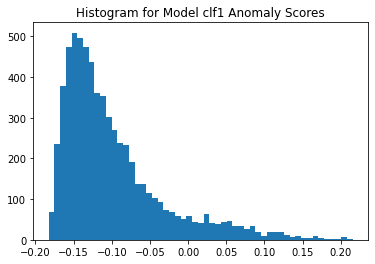

In [571]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model clf1 Anomaly Scores")
plt.show()

,0
count,6523.000000
mean,-0.098763
std,0.067199
min,-0.182883
25%,-0.145755
50%,-0.119002
75%,-0.075389
max,0.215832


Text(0.5, 1.0, 'df_y_train_scores Distribution of binned_var')

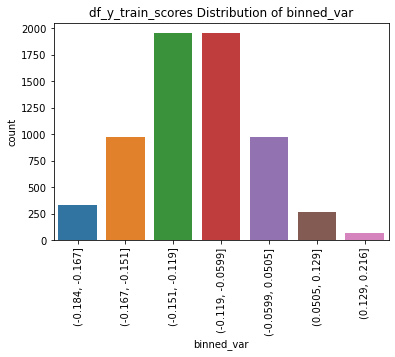

In [572]:
# convert y_train_scores (outlier score) into df
display(pd.DataFrame(y_test_scores).describe())
# check the distritbution of y_train_scores (outlier score)
df_y_test_scores = pd.DataFrame(y_test_scores)
df_y_test_scores.rename(columns={0: 'bins'}, inplace=True)
percentile = [0,0.05,0.2,0.5,0.8,0.95,0.99,1]
df_y_test_scores['binned_var'] = pd.qcut(df_y_test_scores['bins'], percentile, duplicates='drop')
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="binned_var", data=df_y_test_scores)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('df_y_train_scores Distribution of binned_var')

##### 4.2.1.3. Get the Summary Statistics by Cluster <a class="anchor" id="Section_4213"></a>
[Back to Table of Content](#toc)

In [573]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.1, 0, 1)
X_test_cluster['cluster'].value_counts()

X_test_cluster.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,distance
cluster,,,,,,,,,,,
0,-0.063937,-0.001383,-0.047509,-0.048638,-0.063971,-0.037833,-0.063974,-0.045900,-0.063612,-0.021660,-0.103570
1,3.144233,0.068001,2.336348,2.391888,3.145914,1.860518,3.146049,2.257242,3.128239,1.065196,0.137639


In [574]:
from pyod.utils.utility import standardizer
import warnings
warnings.simplefilter(action='ignore')
# standardizer(X_train, X_test)
# X_test.drop(['score', 'cluster'], axis=1, inplace=True)
X_test.shape
print('normals vs anmoalies:\n' + str(X_test_cluster.cluster.value_counts()))
print('anomaly pct:', str(round(X_test_cluster.cluster.value_counts()[1]/(X_test_cluster.cluster.value_counts()[0]+X_test_cluster.cluster.value_counts()[1])*100, 2))+'%')

normals vs anmoalies:
0    6393
1     130
Name: cluster, dtype: int64
anomaly pct: 1.99%


In [575]:
X_test_cluster.columns = ['state_drg_avg_ratio_amount', 'state_drg_med_ratio_amount', 'st_td_avg_ratio_amount', 'st_td_med_ratio_amount',
             'state_drg_avg_medi_ratio_amount', 'state_drg_med_medi_ratio_amount', 'region_drg_avg_ratio_amount',
             'region_td_avg_ratio_amount', 'region_drg_avg_medi_ratio_amount', 'region_drg_pmts_ratio_amount',
                         'distance', 'cluster']

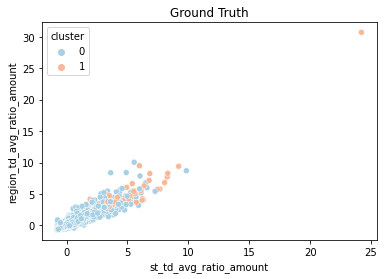

In [579]:
# take st_td_avg_ratio_amount and state_drg_med_ratio_amount in score as an example
sns.scatterplot(x='st_td_avg_ratio_amount', y='region_td_avg_ratio_amount', hue='cluster', data=X_test_cluster, palette='RdBu_r');
plt.title('Ground Truth');

- My thoughts: I use st_td_avg_ratio_amount (x) and region_td_avg_ratio_amount (y) classified by cluster in X_cluster to plot the scatter graph. From the scatter graph above, orange dots are anmalies while blue dots are normal obsercations.

#### 4.2.2 Model 2: max_samples = 80 <a class="anchor" id="Section_422"></a>
##### 4.2.2.1 Build my model <a class="anchor" id="Section_4221"></a>
[Back to Table of Content](#toc)
- My thoughts: Before I implement PyOD, I need to extract the good features from the credit card dataset after EDA. The credit card dataset does not has the target variable Y since the unsupervised KNN models only use the X variables.

In [480]:
# !pip3 install pyod
# !pip install --upgrade pyod
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [481]:
from pyod.models.iforest import IForest
clf2 = IForest(behaviour="new", max_samples=80) 
clf2.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=80, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [482]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
# We apply the model to the test data X_test to get the outlier scores.
y_test_scores = clf2.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

0   -0.063117
1   -0.094961
2   -0.133241
3   -0.164859
4   -0.001555
dtype: float64

- My thoughts: The function decision_functions() generates the anomaly score based on your model predictions. The PCA model uses the Euclidean distance to measure the distance. Since an outlier is the point that is distant from eigenvectors with large eigenvalue, the outlier score is defined as the distance to its eigenvectors. Each point will have an outlier score. Our job is to find those points with high outlier scores.

##### 4.2.2.2 Determine a reasonable boundary <a class="anchor" id="Section_4222"></a>
[Back to Table of Content](#toc)

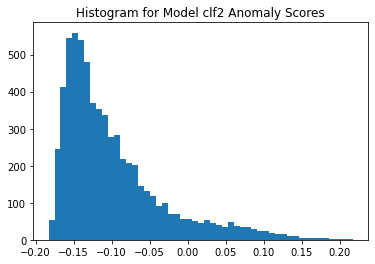

In [483]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model clf2 Anomaly Scores")
plt.show()

,0
count,6523.000000
mean,-0.098600
std,0.067204
min,-0.183093
25%,-0.146400
50%,-0.118953
75%,-0.072769
max,0.217306


Text(0.5, 1.0, 'df_y_train_scores Distribution of binned_var')

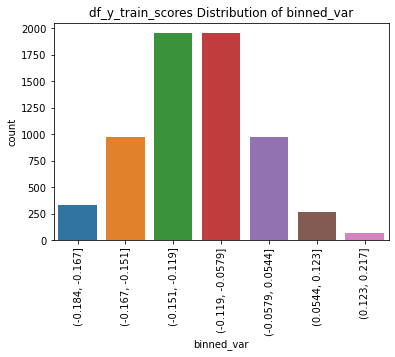

In [484]:
# convert y_train_scores (outlier score) into df
display(pd.DataFrame(y_test_scores).describe())
# check the distritbution of y_train_scores (outlier score)
df_y_test_scores = pd.DataFrame(y_test_scores)
df_y_test_scores.rename(columns={0: 'bins'}, inplace=True)
percentile = [0,0.05,0.2,0.5,0.8,0.95,0.99,1]
df_y_test_scores['binned_var'] = pd.qcut(df_y_test_scores['bins'], percentile, duplicates='drop')
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="binned_var", data=df_y_test_scores)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('df_y_train_scores Distribution of binned_var')

##### 4.2.2.3. Get the Summary Statistics by Cluster <a class="anchor" id="Section_4223"></a>
[Back to Table of Content](#toc)

In [485]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.1, 0, 1)
X_test_cluster['cluster'].value_counts()

X_test_cluster.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,distance
cluster,,,,,,,,,,,
0,-0.061064,-0.000140,-0.044900,-0.049502,-0.061608,-0.034431,-0.061763,-0.043533,-0.062305,-0.020309,-0.103076
1,3.151219,0.007249,2.317052,2.554542,3.179286,1.776791,3.187294,2.246508,3.215252,1.048050,0.132373


In [486]:
from pyod.utils.utility import standardizer
import warnings
warnings.simplefilter(action='ignore')
# standardizer(X_train, X_test)
# X_test.drop(['score', 'cluster'], axis=1, inplace=True)
X_test.shape
print('normals vs anmoalies:\n' + str(X_test_cluster.cluster.value_counts()))
print('anomaly pct:', str(round(X_test_cluster.cluster.value_counts()[1]/(X_test_cluster.cluster.value_counts()[0]+X_test_cluster.cluster.value_counts()[1])*100, 2))+'%')

normals vs anmoalies:
0    6399
1     124
Name: cluster, dtype: int64
anomaly pct: 1.9%


In [488]:
X_test_cluster.columns = ['state_drg_avg_ratio_amount', 'state_drg_med_ratio_amount', 'st_td_avg_ratio_amount', 'st_td_med_ratio_amount',
             'state_drg_avg_medi_ratio_amount', 'state_drg_med_medi_ratio_amount', 'region_drg_avg_ratio_amount',
             'region_td_avg_ratio_amount', 'region_drg_avg_medi_ratio_amount', 'region_drg_pmts_ratio_amount',
                         'distance', 'cluster']

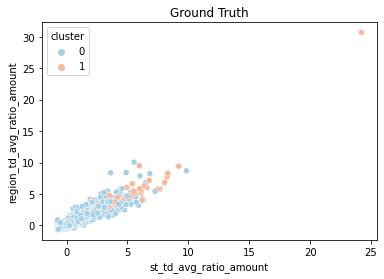

In [489]:
# take st_td_avg_ratio_amount and state_drg_med_ratio_amount in score as an example
sns.scatterplot(x='st_td_avg_ratio_amount', y='region_td_avg_ratio_amount', hue='cluster', data=X_test_cluster, palette='RdBu_r');
plt.title('Ground Truth');

- My thoughts: I use st_td_avg_ratio_amount (x) and region_td_avg_ratio_amount (y) classified by cluster in X_cluster to plot the scatter graph. From the scatter graph above, orange dots are anmalies while blue dots are normal obsercations.

#### 4.2.3 Model 3: max_samples = 60 <a class="anchor" id="Section_423"></a>
##### 4.2.3.1 Build my model <a class="anchor" id="Section_4231"></a>
[Back to Table of Content](#toc)
- My thoughts: Before I implement PyOD, I need to extract the good features from the credit card dataset after EDA. The credit card dataset does not has the target variable Y since the unsupervised KNN models only use the X variables.

In [490]:
# !pip3 install pyod
# !pip install --upgrade pyod
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [491]:
from pyod.models.iforest import IForest
clf3 = IForest(behaviour="new", max_samples=60) 
clf3.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=60, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [492]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
# We apply the model to the test data X_test to get the outlier scores.
y_test_scores = clf1.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

0   -0.056817
1   -0.099941
2   -0.135487
3   -0.160854
4    0.013238
dtype: float64

- My thoughts: The function decision_functions() generates the anomaly score based on your model predictions. The PCA model uses the Euclidean distance to measure the distance. Since an outlier is the point that is distant from eigenvectors with large eigenvalue, the outlier score is defined as the distance to its eigenvectors. Each point will have an outlier score. Our job is to find those points with high outlier scores.

##### 4.2.3.2 Determine a reasonable boundary <a class="anchor" id="Section_4232"></a>
[Back to Table of Content](#toc)

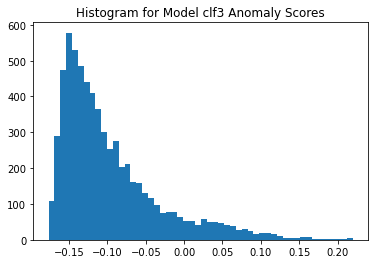

In [493]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model clf3 Anomaly Scores")
plt.show()

,0
count,6523.000000
mean,-0.096791
std,0.065042
min,-0.176781
25%,-0.143643
50%,-0.116732
75%,-0.071102
max,0.220076


Text(0.5, 1.0, 'df_y_train_scores Distribution of binned_var')

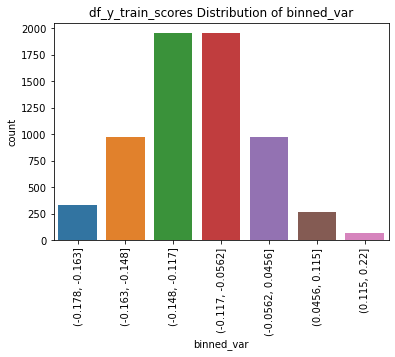

In [494]:
# convert y_train_scores (outlier score) into df
display(pd.DataFrame(y_test_scores).describe())
# check the distritbution of y_train_scores (outlier score)
df_y_test_scores = pd.DataFrame(y_test_scores)
df_y_test_scores.rename(columns={0: 'bins'}, inplace=True)
percentile = [0,0.05,0.2,0.5,0.8,0.95,0.99,1]
df_y_test_scores['binned_var'] = pd.qcut(df_y_test_scores['bins'], percentile, duplicates='drop')
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="binned_var", data=df_y_test_scores)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('df_y_train_scores Distribution of binned_var')

##### 4.2.3.3. Get the Summary Statistics by Cluster <a class="anchor" id="Section_4233"></a>
[Back to Table of Content](#toc)

In [495]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.1, 0, 1)
X_test_cluster['cluster'].value_counts()

X_test_cluster.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,distance
cluster,,,,,,,,,,,
0,-0.053851,-0.000910,-0.044234,-0.038200,-0.050988,-0.036172,-0.053782,-0.043778,-0.050733,-0.017501,-0.100616
1,3.260031,0.055117,2.677805,2.312529,3.086725,2.189759,3.255814,2.650235,3.071281,1.059473,0.134744


In [496]:
from pyod.utils.utility import standardizer
import warnings
warnings.simplefilter(action='ignore')
# standardizer(X_train, X_test)
# X_test.drop(['score', 'cluster'], axis=1, inplace=True)
X_test.shape
print('normals vs anmoalies:\n' + str(X_test_cluster.cluster.value_counts()))
print('anomaly pct:', str(round(X_test_cluster.cluster.value_counts()[1]/(X_test_cluster.cluster.value_counts()[0]+X_test_cluster.cluster.value_counts()[1])*100, 2))+'%')

normals vs anmoalies:
0    6417
1     106
Name: cluster, dtype: int64
anomaly pct: 1.63%


In [502]:
X_test_cluster.columns = ['state_drg_avg_ratio_amount', 'state_drg_med_ratio_amount', 'st_td_avg_ratio_amount', 'st_td_med_ratio_amount',
             'state_drg_avg_medi_ratio_amount', 'state_drg_med_medi_ratio_amount', 'region_drg_avg_ratio_amount',
             'region_td_avg_ratio_amount', 'region_drg_avg_medi_ratio_amount', 'region_drg_pmts_ratio_amount', 'distance', 'cluster']

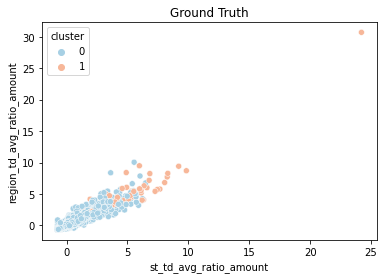

In [503]:
# take st_td_avg_ratio_amount and state_drg_med_ratio_amount in score as an example
sns.scatterplot(x='st_td_avg_ratio_amount', y='region_td_avg_ratio_amount', hue='cluster', data=X_test_cluster, palette='RdBu_r');
plt.title('Ground Truth');

- My thoughts: I use st_td_avg_ratio_amount (x) and region_td_avg_ratio_amount (y) classified by cluster in X_cluster to plot the scatter graph. From the scatter graph above, orange dots are anmalies while blue dots are normal obsercations.

## Aggregating multiple models for better accuracy

In [504]:
from datetime import datetime
from pyod.models.combination import aom, moa, average, maximization
start=datetime.now()
# Put all the predictions in a data frame
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

test_scores  = pd.DataFrame({'clf1': clf1.decision_function(X_test),
                             'clf2': clf2.decision_function(X_test),
                             'clf3': clf3.decision_function(X_test) 
                            })
print(datetime.now()-start)
%time train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

0:00:00.545169
Wall time: 2.99 ms


### Method 1: Average

In [505]:
# Combination by average
y_by_average = average(test_scores_norm)
y_by_average[1:10]

array([ 0.06229529, -0.4809886 , -0.98549939,  1.49109922, -1.16222482,
       -1.0968326 , -0.42338681, -0.92795385, -0.11664486])

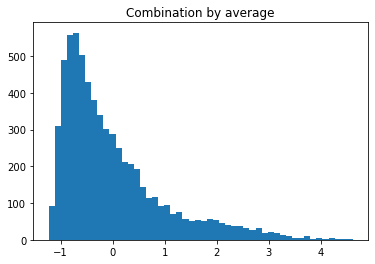

In [506]:
# Combination by average
y_by_average = average(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

Text(0.5, 1.0, 'df_y_by_average Distribution of binned_var')

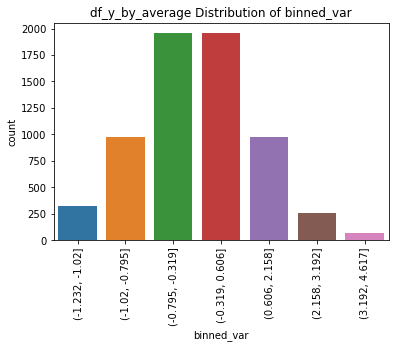

In [507]:
# check the distritbution of y_test_scores
df_y_by_average = pd.DataFrame(y_by_average)
df_y_by_average.rename(columns={0: 'bins'}, inplace=True)
percentile = [0,0.05,0.2,0.5,0.8,0.95,0.99,1]
df_y_by_average['binned_var'] = pd.qcut(df_y_by_average['bins'], percentile, duplicates='drop')
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="binned_var", data=df_y_by_average)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('df_y_by_average Distribution of binned_var')

In [508]:
df_test = pd.DataFrame(X_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<3, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    6423
1     100
Name: y_by_average_cluster, dtype: int64

In [509]:
df_test.groupby('y_by_average_cluster').mean()

,0,1,2,3,4,5,6,7,8,9,y_by_average_score
y_by_average_cluster,,,,,,,,,,,
0,-0.053203,-0.003445,-0.035131,-0.041741,-0.052451,-0.028254,-0.054505,-0.034447,-0.053413,-0.021219,-0.065461
1,3.417224,0.221263,2.256466,2.680993,3.368934,1.814724,3.500873,2.212552,3.430708,1.362912,3.461141


### Method 2: The Maximum of Maximum (MOM)

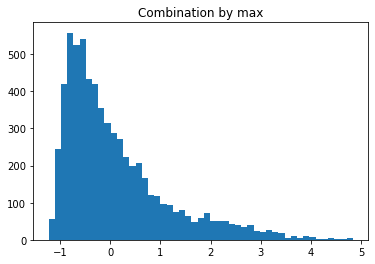

In [510]:
# Combination by max
y_by_maximization = maximization(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.show()

Text(0.5, 1.0, 'df_y_by_maximization Distribution of binned_var')

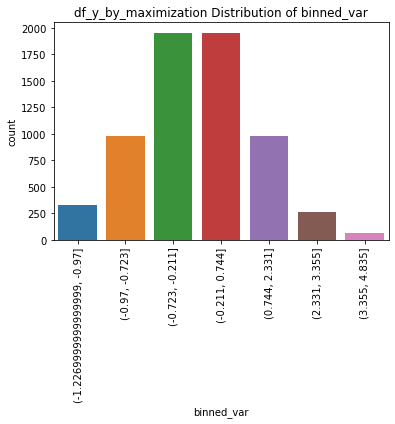

In [511]:
# check the distritbution of y_test_scores
df_y_by_maximization = pd.DataFrame(y_by_maximization)
df_y_by_maximization.rename(columns={0: 'bins'}, inplace=True)
percentile = [0,0.05,0.2,0.5,0.8,0.95,0.99,1]
df_y_by_maximization['binned_var'] = pd.qcut(df_y_by_maximization['bins'], percentile, duplicates='drop')
# Plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="binned_var", data=df_y_by_maximization)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('df_y_by_maximization Distribution of binned_var')

In [512]:
df_test = pd.DataFrame(X_test)
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<3, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()

0    6389
1     134
Name: y_by_maximization_cluster, dtype: int64

In [513]:
df_test.groupby('y_by_maximization_cluster').mean()

,0,1,2,3,4,5,6,7,8,9,y_by_average_score,y_by_average_cluster,y_by_maximization_score
y_by_maximization_cluster,,,,,,,,,,,,,
0,-0.063919,-0.002066,-0.050203,-0.049931,-0.061609,-0.041330,-0.064429,-0.049136,-0.062246,-0.023794,-0.081040,0.000000,0.025748
1,3.047585,0.098528,2.393643,2.380678,2.937484,1.970593,3.071917,2.342745,2.967833,1.134485,3.309146,0.746269,3.499503


#### Summary
- In ANN 3 methods, Average, The Maximum of Maximum (MOM). In our case it identifies 59, and 59 data points that have the outlier scores higher than 3. The outliers number is closed with range in 100.
- In iForest 2 methods, Average, The Maximum of Maximum (MOM). In our case it identifies 100, and 134 data points that have the outlier scores higher than 3. The outliers number is closed with range in 100.
#### Limitation and Improvement
- The ANN and iForest models have been implemented. More PyOd or even other anomaly detection methods can be leveraged in the future to strengthen the anomaly detection.